In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [167]:
!pip install nbconvert[webpdf] --allow-chromium-download



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --allow-chromium-download


## Data Cleaning & Data Tidying

Steps: 

a) Pre-processing involves unnesting of the data in columns like Actor, Director, Country.

b) Remove the NaN/null values
1. Identification of null value: isnull().
2. Replace numerical column missing value with mean for that column.
3. Replace categorical column missing value with mode/'unknown' & numerical column missing values with mean

## EDA: 

1. Non-Graphical Analysis: Value counts and unique attributes

2. Visual Analysis - Univariate, Bivariate after pre-processing of the data

    2.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

    2.2 For categorical variable(s): Boxplot

    2.3 For correlation: Heatmaps, Pairplots

### Business Insights 
Explore the data, answer the following:

Start by exploring a few questions: 

1. What type of content is available in different countries?
2. How has the number of movies released per year changed over the last 20-30 years?
3. Comparison of tv shows vs. movies.
4. What is the best time to launch a TV show?
5. Analysis of actors/directors of different types of shows/movies.
6. Does Netflix has more focus on TV Shows than movies in recent years
7. Understanding what content is available in different countries

In [2]:
df=pd.read_csv(r"C:\Users\Tnluser\Desktop\Python_Libraries\netflix.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
df.size

105684

### Data Cleaning & Data Tidying

#### Title vs Cast
Data is in the nested form, split it into list and then stack the dataframe
</h2> Functions used: </h2>

</b> 
split(',')
tolist()
stack() or melt()
 </b>

In [5]:
constraint=df.cast.apply(lambda x: str(x).split(',')).tolist()


In [6]:
df_cast=pd.DataFrame(constraint,index=df['title'])
df_cast.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [8]:
type(df_cast)

pandas.core.series.Series

In [9]:
df_cast=pd.DataFrame(df_cast)
df_cast

0
title                                         
Dick Johnson Is Dead 0                     nan
Blood & Water        0              Ama Qamata
                     1             Khosi Ngema
                     2           Gail Mabalane
                     3          Thabang Molaba
...                                        ...
Zubaan               3        Manish Chaudhary
                     4            Meghna Malik
                     5           Malkeet Rauni
                     6          Anita Shabdish
                     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [10]:
df_cast.reset_index(inplace=True)
df_cast.drop(columns=['level_1'],inplace=True)
df_cast.columns=['title','cast']
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


#### Title vs Director

In [169]:
director=df.director.apply(lambda x: str(x).split(',')).tolist()
director[:10]

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi']]

In [12]:
df_director=pd.DataFrame(director,index=df.title)
df_director=pd.DataFrame(df_director.stack())
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [13]:
df_director.columns=['title','director']
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


#### Country vs Title

In [170]:
country=df.country.apply(lambda x:str(x).split(',')).tolist()
country[:10]

[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  ' Ghana',
  ' Burkina Faso',
  ' United Kingdom',
  ' Germany',
  ' Ethiopia'],
 ['United Kingdom'],
 ['United States']]

In [15]:
df_country=pd.DataFrame(country,index=df.title)
df_country=pd.DataFrame(df_country.stack()).reset_index()
df_country

,title,level_1,0
0,Dick Johnson Is Dead,0,United States
1,Blood & Water,0,South Africa
2,Ganglands,0,nan
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,India
...,...,...,...
10845,Zodiac,0,United States
10846,Zombie Dumb,0,nan
10847,Zombieland,0,United States
10848,Zoom,0,United States


In [16]:
df_country=df_country[['title',0]]
df_country.columns=['title','country']
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


#### Title vs genre/Listed_in

In [171]:
genre=df.listed_in.apply(lambda x:x.split(',')).tolist()
genre[:10]

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas']]

In [18]:
df_genre=pd.DataFrame(genre, index=df.title)
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre).reset_index()
df_genre=df_genre[['title',0]]
df_genre.columns=['title','genre']
df_genre


,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


### Available tables are as following

df_cast, df_director, df_country, df_genre, df (main dataframe for other columns)

In [19]:
df_main=df_cast.merge(df,on='title',how='left')
df_main=df_main[['title','cast_x','type','date_added','release_year','rating','duration']]
df_main.head()

,title,cast_x,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Khosi Ngema,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Gail Mabalane,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Thabang Molaba,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [20]:
## Get duration in uniformity to do computations
df_main['duration']=df_main.duration.apply(lambda x:str(x).split(" ")).apply(lambda x:x[0])
df_main

,title,cast_x,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,TV Show,"September 24, 2021",2021,TV-MA,2
2,Blood & Water,Khosi Ngema,TV Show,"September 24, 2021",2021,TV-MA,2
3,Blood & Water,Gail Mabalane,TV Show,"September 24, 2021",2021,TV-MA,2
4,Blood & Water,Thabang Molaba,TV Show,"September 24, 2021",2021,TV-MA,2
...,...,...,...,...,...,...,...
64946,Zubaan,Manish Chaudhary,Movie,"March 2, 2019",2015,TV-14,111
64947,Zubaan,Meghna Malik,Movie,"March 2, 2019",2015,TV-14,111
64948,Zubaan,Malkeet Rauni,Movie,"March 2, 2019",2015,TV-14,111
64949,Zubaan,Anita Shabdish,Movie,"March 2, 2019",2015,TV-14,111


In [21]:
## month, year from date
# Convert the 'Date' column to datetime format
df_main['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year from the 'Date' column
df_main['Year'] = df_main['date_added'].dt.year
df_main['month']=df_main['date_added'].dt.month
df_main.rename(columns={'cast_x':'cast'},inplace=True)
df_main.head()


,title,cast,type,date_added,release_year,rating,duration,Year,month
0,Dick Johnson Is Dead,nan,Movie,2021-09-25,2020,PG-13,90,2021.0,9.0
1,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0
2,Blood & Water,Khosi Ngema,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0
3,Blood & Water,Gail Mabalane,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0
4,Blood & Water,Thabang Molaba,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0


In [22]:
df_main=df_main.merge(df_director,on='title',how='left')
df_main=df_main.merge(df_country,on='title',how='left')
df_main=df_main.merge(df_genre,on='title',how='left')
df_main

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre
0,Dick Johnson Is Dead,nan,Movie,2021-09-25,2020,PG-13,90,2021.0,9.0,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,nan,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Movie,NaT,2015,TV-14,111,NaN,NaN,Mozez Singh,India,International Movies
202061,Zubaan,Anita Shabdish,Movie,NaT,2015,TV-14,111,NaN,NaN,Mozez Singh,India,Music & Musicals
202062,Zubaan,Chittaranjan Tripathy,Movie,NaT,2015,TV-14,111,NaN,NaN,Mozez Singh,India,Dramas
202063,Zubaan,Chittaranjan Tripathy,Movie,NaT,2015,TV-14,111,NaN,NaN,Mozez Singh,India,International Movies


In [23]:
df_main.columns

Index(['title', 'cast', 'type', 'date_added', 'release_year', 'rating',
       'duration', 'Year', 'month', 'director', 'country', 'genre'],
      dtype='object')

### Handling Null values
categical data by replacing with mode and the numerical value with mean 


In [24]:
df_main.isna().sum()

title                0
cast                 0
type                 0
date_added      175820
release_year         0
rating              67
duration             0
Year            175820
month           175820
director             0
country              0
genre                0
dtype: int64

In [25]:
df_main.replace(['nan'],np.nan,inplace=True)
df_main.isna().sum()

title                0
cast              2149
type                 0
date_added      175820
release_year         0
rating              67
duration             3
Year            175820
month           175820
director         50643
country          11897
genre                0
dtype: int64

In [26]:
df_main.rating.value_counts()

TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column

In [27]:
df_main.loc[df_main.duration.isnull(),'duration']=df_main.loc[df_main.duration.isnull(),'duration'].fillna(df_main.rating)
df_main.isna().sum()

title                0
cast              2149
type                 0
date_added      175820
release_year         0
rating              67
duration             0
Year            175820
month           175820
director         50643
country          11897
genre                0
dtype: int64

In [28]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)
df_main.loc[df_main['rating'].str.contains('min', na=False),'rating']='NR'
df_main['rating'].fillna('NR',inplace=True)


In [29]:
#just an attempt to observe nulls in date_added column
df_main[df_main['date_added'].isnull()].head()

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre
18349,Silver Skates,Cathy Belton,Movie,NaT,2020,TV-MA,138,NaN,NaN,Michael Lockshin,NaN,Action & Adventure
18350,Silver Skates,Cathy Belton,Movie,NaT,2020,TV-MA,138,NaN,NaN,Michael Lockshin,NaN,Dramas
18351,Silver Skates,Cathy Belton,Movie,NaT,2020,TV-MA,138,NaN,NaN,Michael Lockshin,NaN,International Movies
18527,To All the Boys: Always and Forever - The Afte...,"Cast members of the ""To All the Boys"" films di...",Movie,NaT,2021,TV-MA,36,NaN,NaN,NaN,NaN,Movies
20411,Seven Souls in the Skull Castle: Season Moon K...,Tetsuya Chiba,Movie,NaT,2017,TV-PG,212,NaN,NaN,Hidenori Inoue,NaN,Action & Adventure


In [30]:
df_main.mode()

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre
0,Kahlil Gibran's The Prophet,Alfred Molina,Movie,2020-01-01,2018,TV-MA,1,2019.0,7.0,Martin Scorsese,United States,International Movies


In [31]:

#considering all the columns as  categorical columns
# Replace missing values with the mode for categorical columns
# Replace missing values with the mode of each column
#.iloc[0] does not select the first row of the DataFrame returned by df_main.mode(). Instead, it selects the first row of the resulting DataFrame after calling df_main.mode()
#df_main.fillna(df_main.mode().iloc[0],inplace=True)

## in this case replacing nan with unknown

#replacing nan values of director and actor by Unknown Actor and Director
df_main['cast'].replace([np.nan],['Unknown Actor'],inplace=True)
df_main['director'].replace([np.nan],['Unknown Director'],inplace=True)

df_main.head()

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre
0,Dick Johnson Is Dead,Unknown Actor,Movie,2021-09-25,2020,PG-13,90,2021.0,9.0,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,Unknown Director,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,Unknown Director,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,Unknown Director,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,TV Show,2021-09-24,2021,TV-MA,2,2021.0,9.0,Unknown Director,South Africa,International TV Shows


In [32]:
df[df['country'].isnull()& ~df['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
...,...,...,...,...,...,...,...,...,...,...,...,...
8585,s8586,Movie,Three-Quarters Decent,Mohamed Hamdy,"Mohamed Ragab, Lamitta Frangieh, Mohsen Mansou...",NaN,"June 20, 2019",2010,TV-14,96 min,"Comedies, Dramas, International Movies","Determined to fight corruption in his country,..."
8602,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,"Richard Kind, Dana Hill, Anndi McAfee, Tony Ja...",NaN,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...
8622,s8623,Movie,Tremors 2: Aftershocks,S.S. Wilson,"Fred Ward, Chris Gartin, Helen Shaver, Michael...",NaN,"January 1, 2020",1995,PG-13,100 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",A rag-tag team of survivalists and scientists ...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...


In [33]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director
# and imputes in place of nulls the corresponding mode

for i in df_main[df_main['country'].isnull()]['director'].unique():
    
    if i in df_main[~df_main['country'].isnull()]['director'].unique():
        imp=df_main[df_main['director']==i]['country'].mode().values[0]
        df_main.loc[df_main['director']==i,'country']=df_main.loc[df_main['director']==i,'country'].fillna(imp)

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [34]:
for i in df_main[df_main['country'].isnull()]['cast'].unique():
    if i in df_main[~df_main['country'].isnull()]['cast'].unique():
        imp = df_main[df_main['cast']==i]['country'].mode().values[0]
        df_main.loc[df_main['cast']==i, 'country'] = df_main[df_main['cast']==i]['country'].fillna(imp)


In [35]:
#If there are still nulls, I just replace it by Unknown Country
df_main['country'].fillna('Unknown Country',inplace=True)
df_main.isnull().sum()

title                0
cast                 0
type                 0
date_added      175820
release_year         0
rating               0
duration             0
Year            175820
month           175820
director             0
country              0
genre                0
dtype: int64

In [36]:
df_main['duration'].value_counts()

1         35035
2          9559
3          5088
94         4343
106        4040
          ...  
196           4
18            4
74 min        1
84 min        1
66 min        1
Name: duration, Length: 213, dtype: int64

In [37]:

df_main['duration']=df_main['duration'].apply(lambda x:str(x).split(' ')).apply(lambda x:x[0])
df_main['duration'].value_counts()

1      35035
2       9559
3       5088
94      4343
106     4040
       ...  
39         5
16         4
196        4
20         4
18         4
Name: duration, Length: 210, dtype: int64

## EDA

### Univariate Analysis in terms of counts of each column

In [38]:
#number of distinct titles on the basis of genre
df_main.groupby('genre')['title'].size()

genre
 Anime Features               765
 Children & Family Movies     477
 Classic & Cult TV             36
 Classic Movies               497
 Comedies                    6935
                             ... 
TV Dramas                     986
TV Horror                     191
TV Sci-Fi & Fantasy             7
TV Shows                      337
Thrillers                     824
Name: title, Length: 73, dtype: int64

In [39]:
df_main.groupby(['genre']).agg({'title':'nunique'})

,title
genre,
Anime Features,50
Children & Family Movies,36
Classic & Cult TV,6
Classic Movies,36
Comedies,464
...,...
TV Dramas,67
TV Horror,11
TV Sci-Fi & Fantasy,1


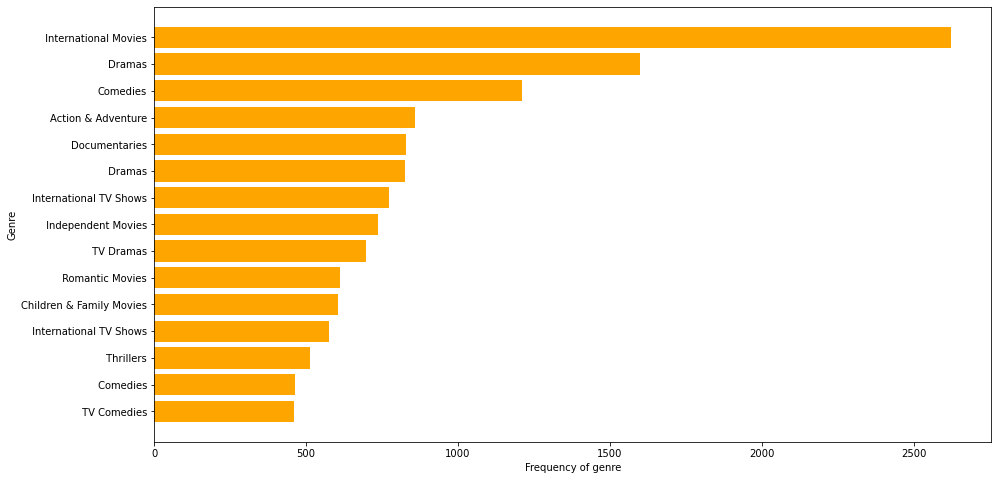

In [40]:
df_genre_count=df_main.groupby(['genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre_count[::-1]['genre'],df_genre_count[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of genre')
plt.ylabel('Genre')
plt.show()

### Observation: 1. International Movies, Dramas and Comedies are the most popular . 

In [41]:
#number of distinct titles on the basis of type
df_main.groupby(['type']).agg({'title':'nunique'})

,title
type,
Movie,6131
TV Show,2676


([<matplotlib.patches.Wedge at 0x27c24a05fd0>,
 [Text(-0.6646532284688217, 0.938475405051178, 'Movie'),
  Text(0.6646532284688216, -0.9384754050511781, 'TV Show')],
 [Text(-0.37567356391716006, 0.5304426202463179, '69.6%'),
  Text(0.37567356391716, -0.5304426202463179, '30.4%')])

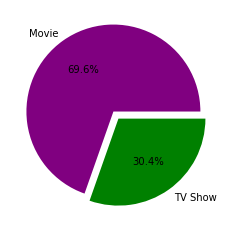

In [42]:
df_type_count=df_main.groupby(['type']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.pie(df_type_count.title,explode=(0.05,0.05),labels=df_type_count['type'],colors=['purple','green'],autopct='%0.1f%%')

### Observation:  We have 70:30 ratio of Movies and TV Shows in our data

In [43]:
#number of distinct titles on the basis of country
df_main.groupby(['country']).agg({"title":"nunique"})

,title
country,
,8
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Uruguay,9
Venezuela,2
Vietnam,7


The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or United States and United States, are shown as different countries.They should have been same

In [44]:
df_main['country']=df_main.country.str.replace(',','')


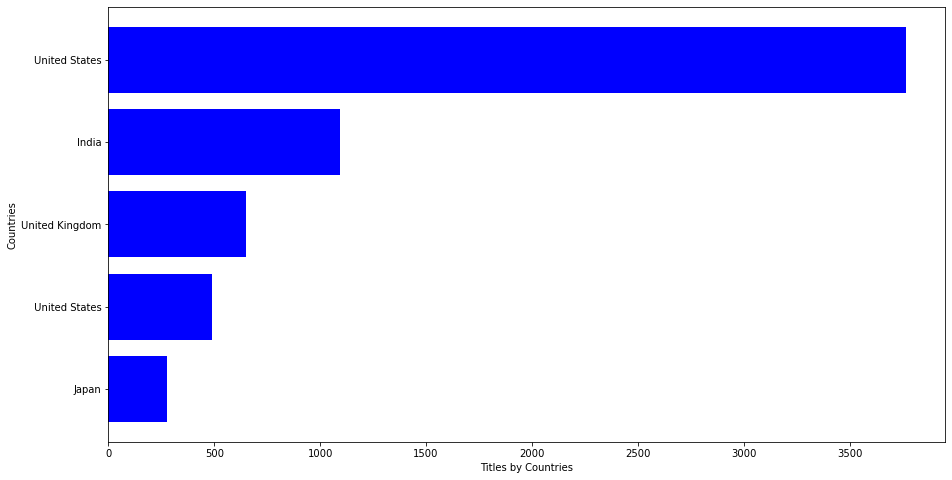

In [45]:
df_country=df_main.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

### Observation: 4. US,India,UK,Canada and France are leading countries in Content Creation on Netflix

In [46]:
#number of distinct titles on the basis of rating
df_main.groupby(['rating']).agg({"title":"nunique"})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207


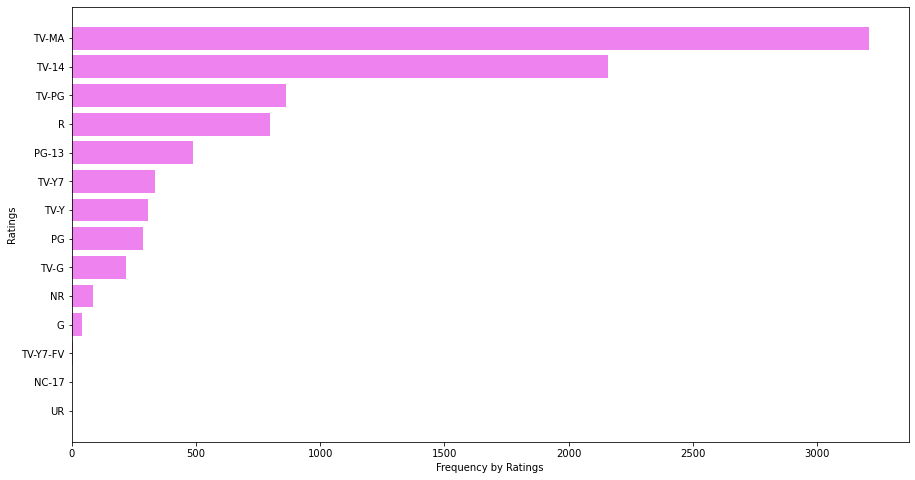

In [47]:
df_main_rating_count=df_main.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_main_rating_count[::-1]['rating'],df_main_rating_count[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()
        

### Outcome: 5. Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

In [48]:
#number of distinct titles on the basis of duration
df_main.groupby(['duration']).agg({"title":"nunique"})

,title
duration,
1,1793
10,8
100,108
101,116
102,122
...,...
95,137
96,130
97,146


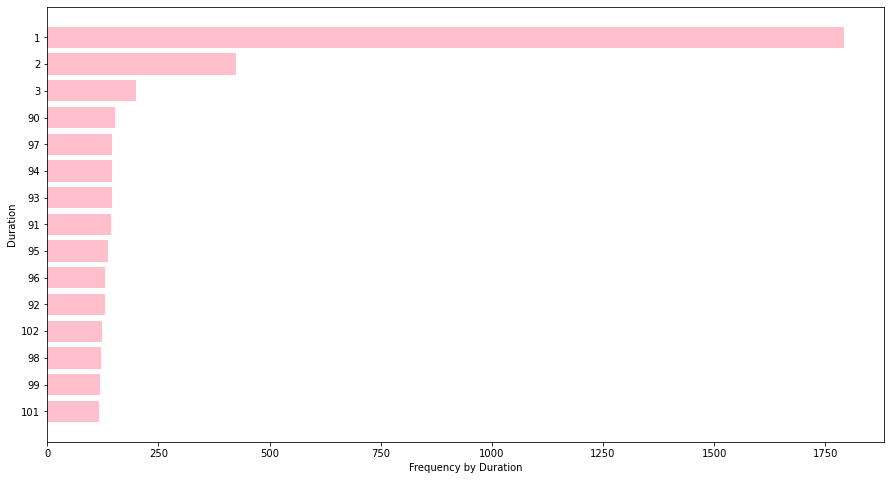

In [49]:
df_main_duration_count=df_main.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_main_duration_count[::-1]['duration'],df_main_duration_count[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

### Observation 6.The duration of Most Watched content in our whole data is 90-101 mins.These must be movies and Shows having only 1 Season.

In [50]:
#number of distinct titles on the basis of Actors
df_main.groupby(['cast']).agg({"title":"nunique"})

,title
cast,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,1
2 Chainz,1
2Mex,1
...,...
İbrahim Büyükak,1
İbrahim Çelikkol,1
Şahin Irmak,1


Text(0, 0.5, 'actors')

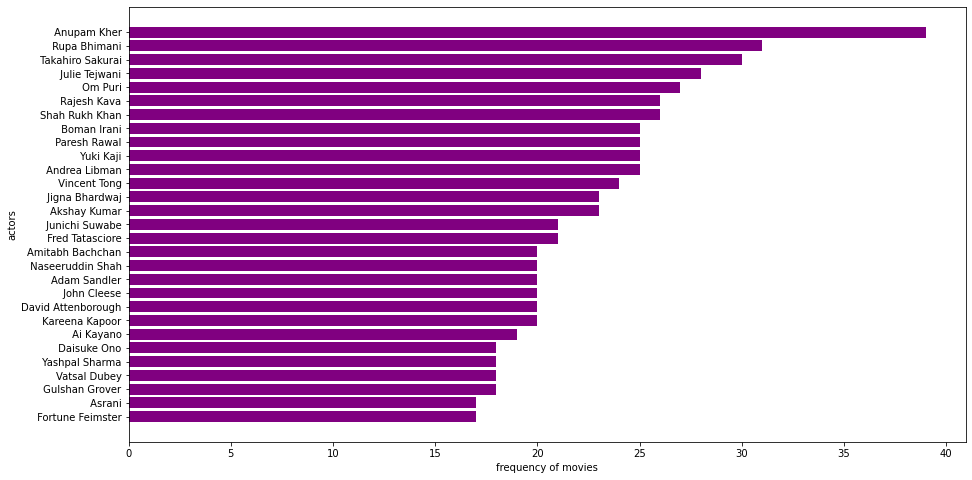

In [51]:
df_cast_count=df_main.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_cast_count=df_cast_count[df_cast_count.cast!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_cast_count[::-1].cast,df_cast_count[::-1].title,color=['purple'])
plt.xlabel('frequency of movies')
plt.ylabel('actors')

### Anupam Kher,Rupa Bimani,Takahiro Sakurai,Julie Tejwani, Om Puri occupy the top stop in Most Watched content.

In [52]:
#number of distinct titles on the basis of Actors
df_main.groupby(['director']).agg({"title":"nunique"})

,title
director,
Aaron Moorhead,2
Aaron Woolf,1
Abbas Alibhai Burmawalla,1
Abdullah Al Noor,1
Abhinav Shiv Tiwari,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


Text(0, 0.5, 'director')

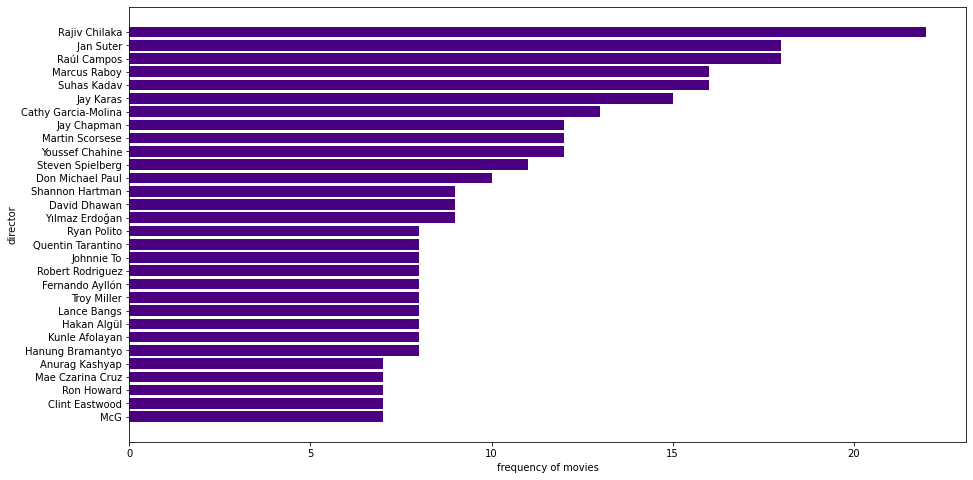

In [53]:
df_director_count=df_main.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by='title',ascending=False)[:31]
df_director_count=df_director_count[df_director_count.director!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_director_count[::-1].director,df_director_count[::-1].title,color=['indigo'])
plt.xlabel('frequency of movies')
plt.ylabel('director')

### Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

In [54]:
#number of distinct titles on the basis of year
df_year_count=df_main[~df_main.Year.isna()]
df_year_count.Year=df_year_count.Year.apply(lambda x:int(x))
df_year_count=df_year_count.groupby(['Year']).agg({"title":"nunique"}).reset_index()
df_year_count

C:\Users\Tnluser\AppData\Local\Temp\ipykernel_127004\3854577662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_count.Year=df_year_count.Year.apply(lambda x:int(x))


,Year,title
0,2008,2
1,2009,1
2,2010,1
3,2011,4
4,2012,3
5,2013,6
6,2014,11
7,2015,43
8,2016,155
9,2017,337


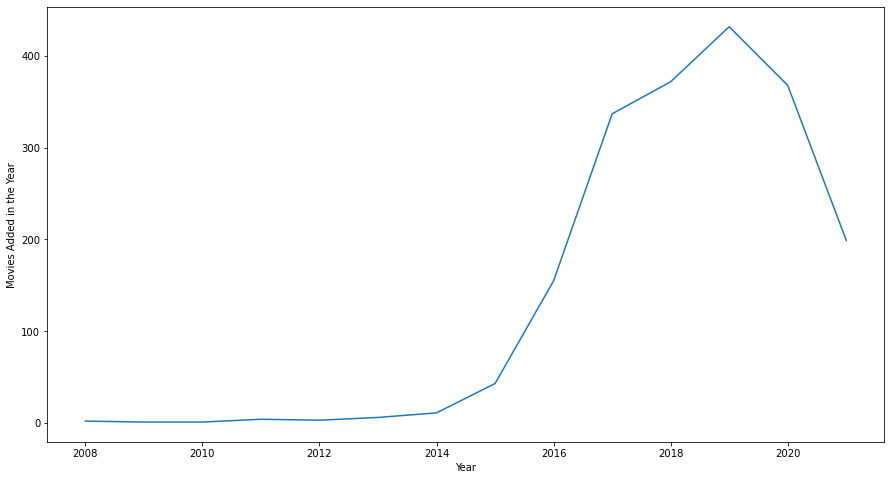

In [55]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_year_count,y='title',x='Year')
plt.ylabel("Movies Added in the Year")
plt.xlabel("Year")
plt.show()

### The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

In [56]:
#number of distinct titles on the basis of month
df_month_count=df_main.groupby(['month']).agg({"title":"nunique"}).reset_index()
df_month_count=df_month_count[~df_month_count.month.isna()]
df_month_count.month=df_month_count.month.astype(int)
df_month_count

,month,title
0,1,248
1,2,191
2,3,251
3,4,232
4,5,198
5,6,199
6,7,242
7,8,236
8,9,227
9,10,222


Text(0, 0.5, 'movies released per month')

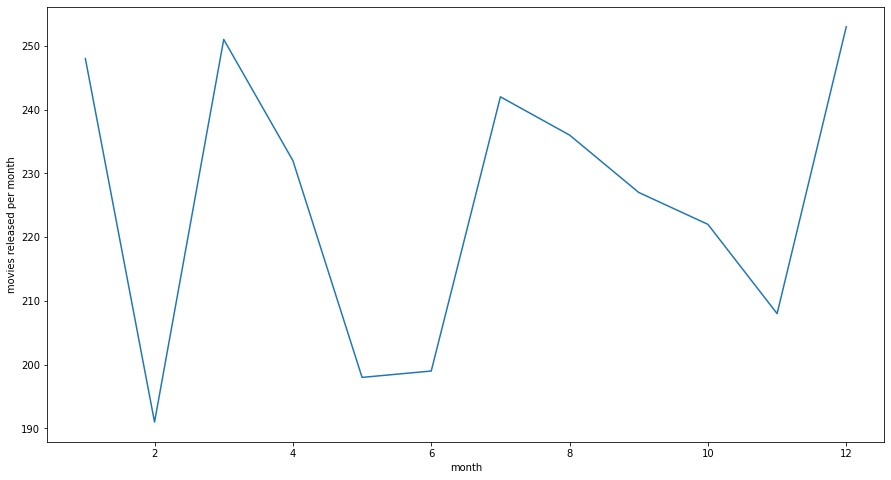

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_month_count,x='month',y='title')
plt.xlabel('month')
plt.ylabel('movies released per month')

### Most of the content is added in the first and last months across Netflix

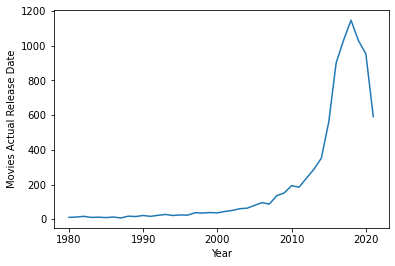

In [58]:
df_release_year=df_main[df_main['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

### Net content release which are later uploaded to Netflix has increased since 1980 till 2020 though later reduced certainly due to COVID-19

#### Question 1: How has the number of movies released per year changed over the last 20-30 years?

In [59]:
# Step 1: Filter the DataFrame for the last 20-30 years
current_year = pd.Timestamp.now().year
start_year = current_year - 30
filtered_df = df_main[(df_main['Year'] >= start_year)]

# Step 2 and 3: Group by year and count the number of movies released each year
movies_per_year = filtered_df.groupby('Year').size()
df_movies_per_year=pd.DataFrame(movies_per_year,columns=['movie_count'])
df_movies_per_year.reset_index(inplace=True)
df_movies_per_year

,Year,movie_count
0,2008.0,5
1,2009.0,4
2,2010.0,3
3,2011.0,45
4,2012.0,9
5,2013.0,49
6,2014.0,79
7,2015.0,250
8,2016.0,1219
9,2017.0,3735


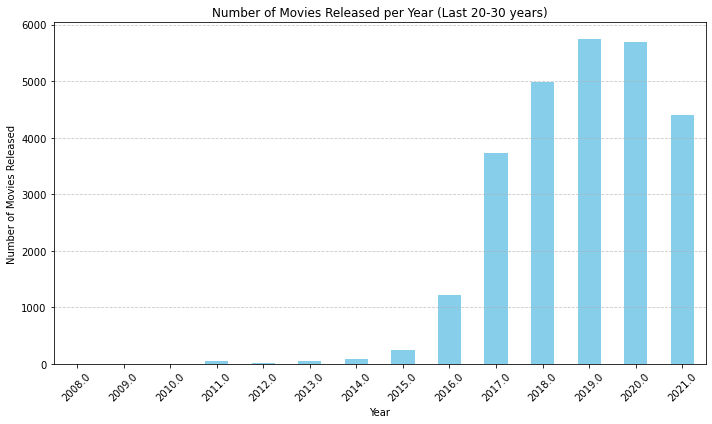

In [60]:
# Step 4: Plot the results
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year (Last 20-30 years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Question2 : Comparison of tv shows vs. movies.

## Univariate Analysis separately for shows and movies

In [61]:
df_shows=df_main[df_main['type']=='TV Show']
df_movies=df_main[df_main['type']=='Movie']

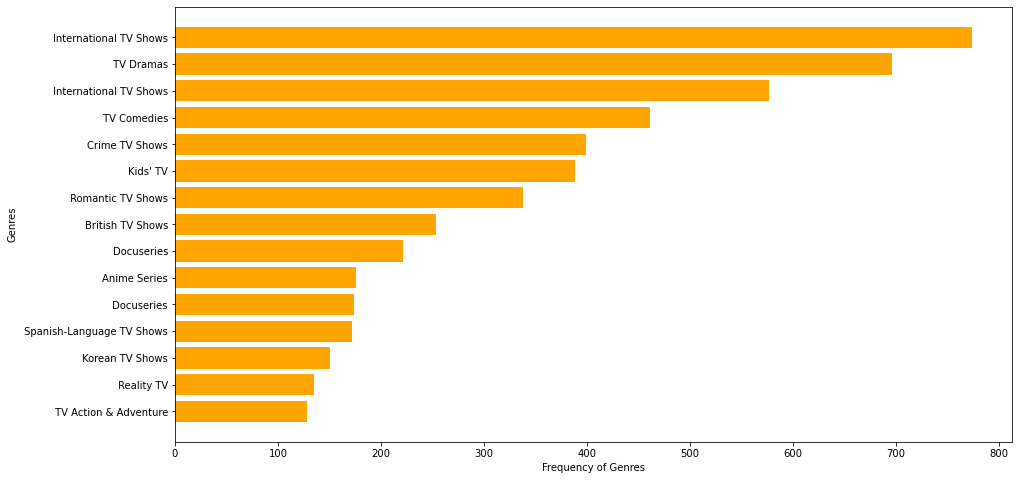

In [62]:
df_genre=df_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

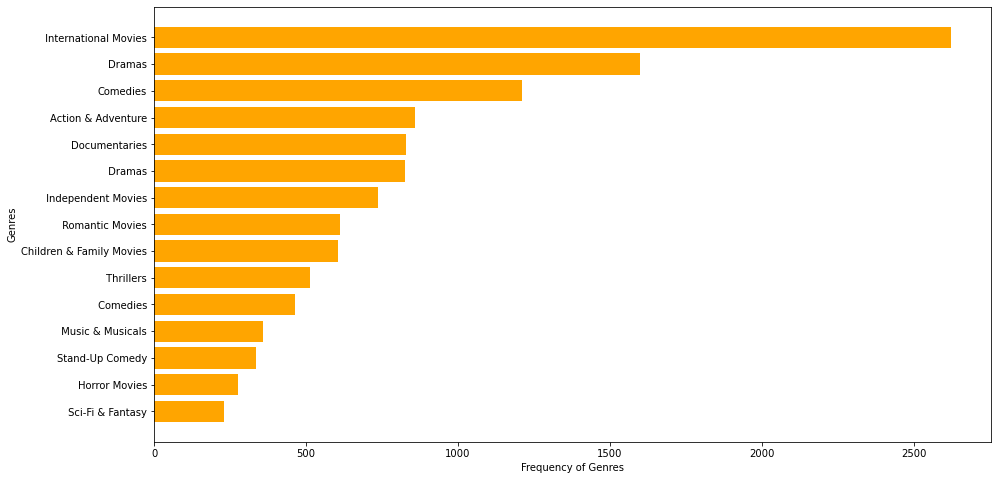

In [63]:
df_genre=df_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

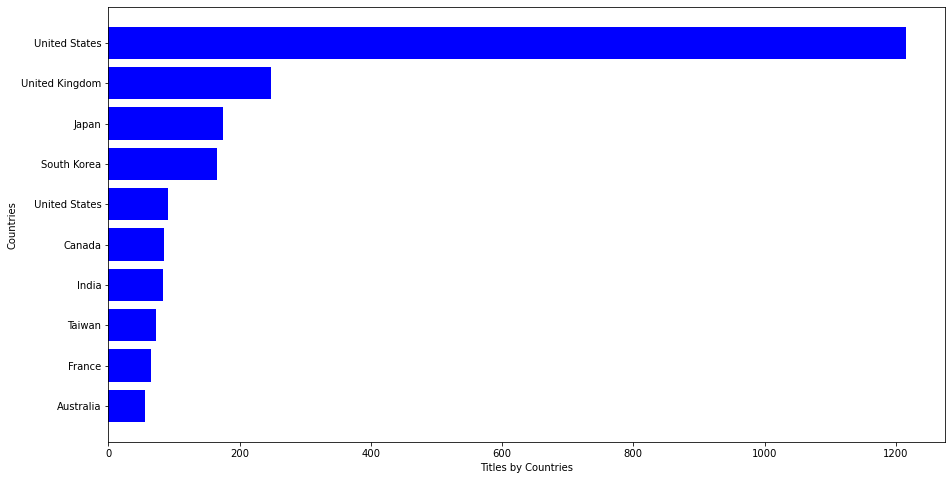

In [64]:
df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

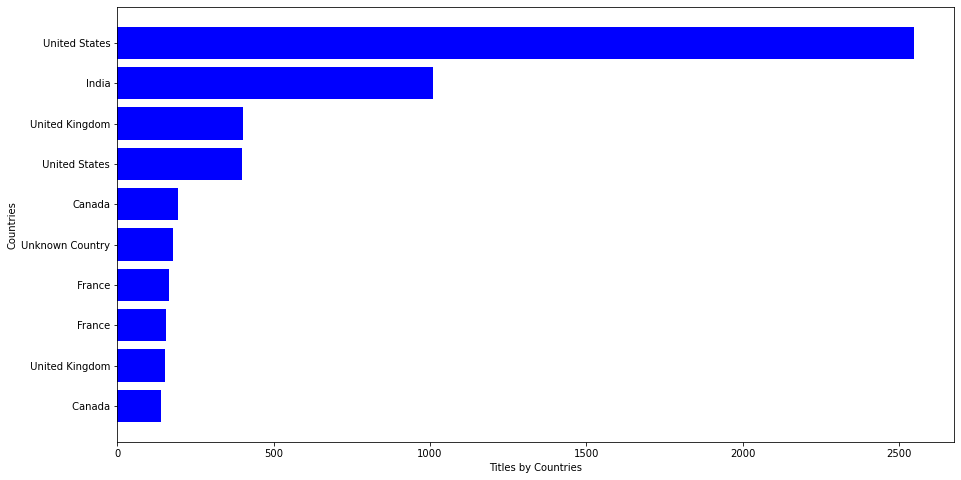

In [65]:
df_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

#### United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

#### Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

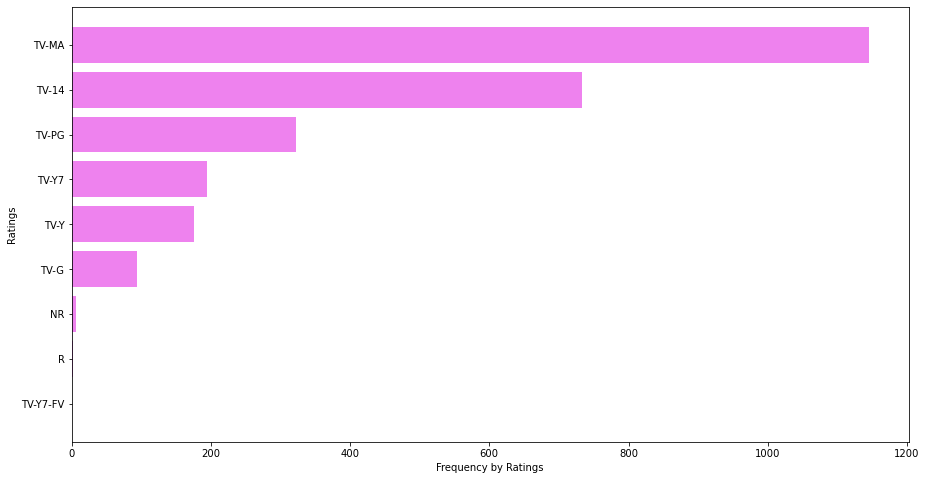

In [66]:
df_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

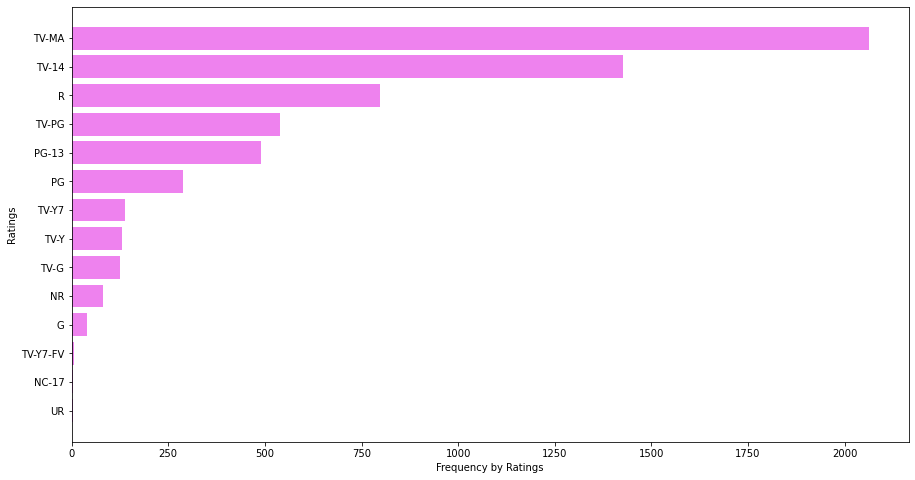

In [67]:
df_rating=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.

Moreover there are no TV Shows having a rating of R

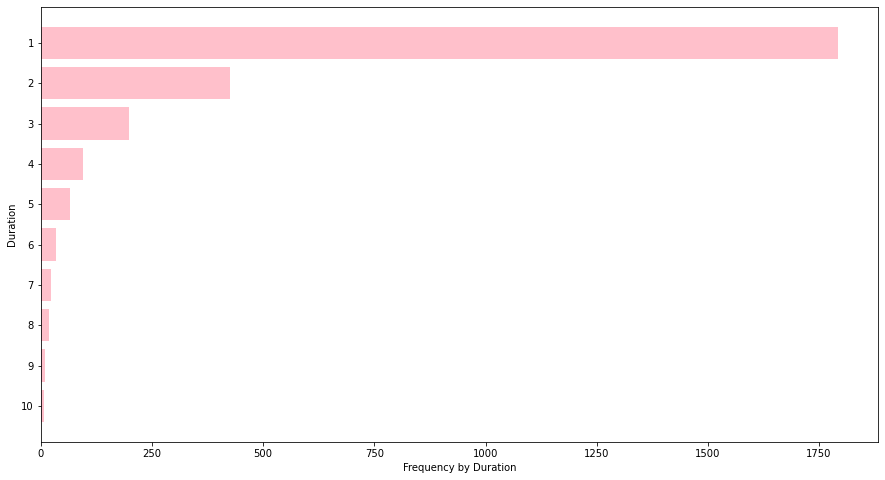

In [68]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

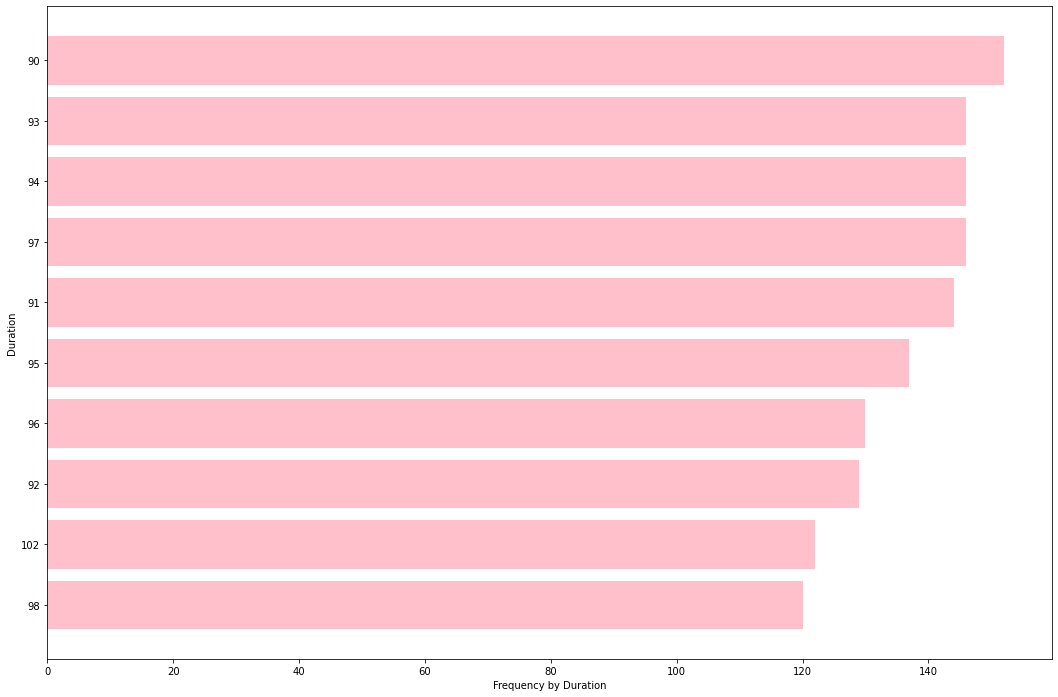

In [69]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(18,12))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

C:\Users\Tnluser\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


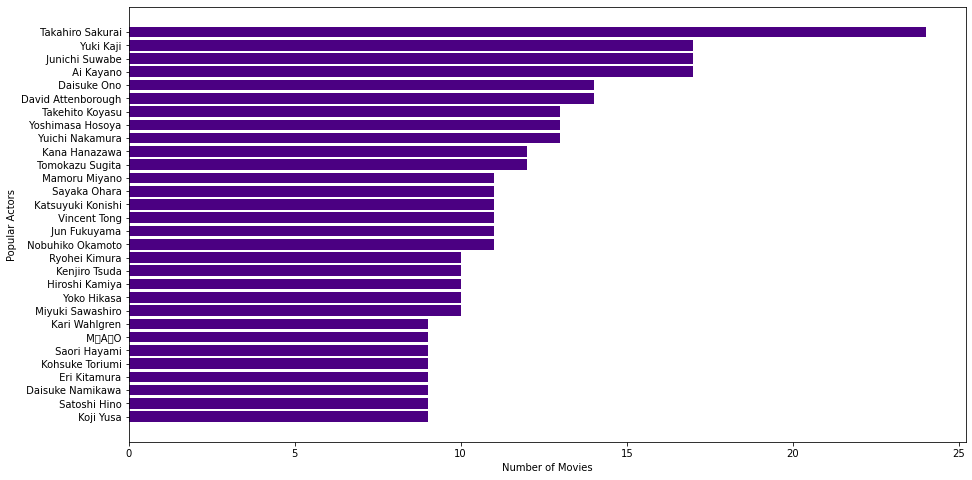

In [70]:
df_actors=df_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

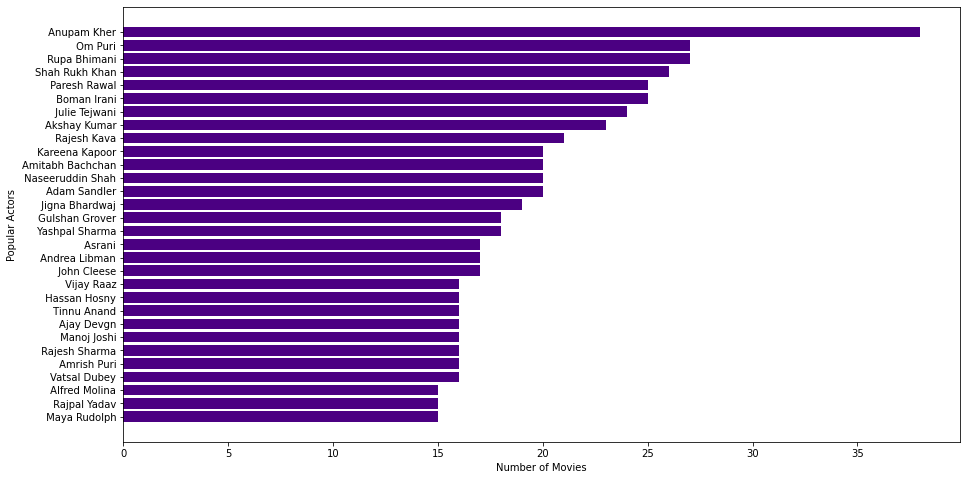

In [71]:
df_actors=df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

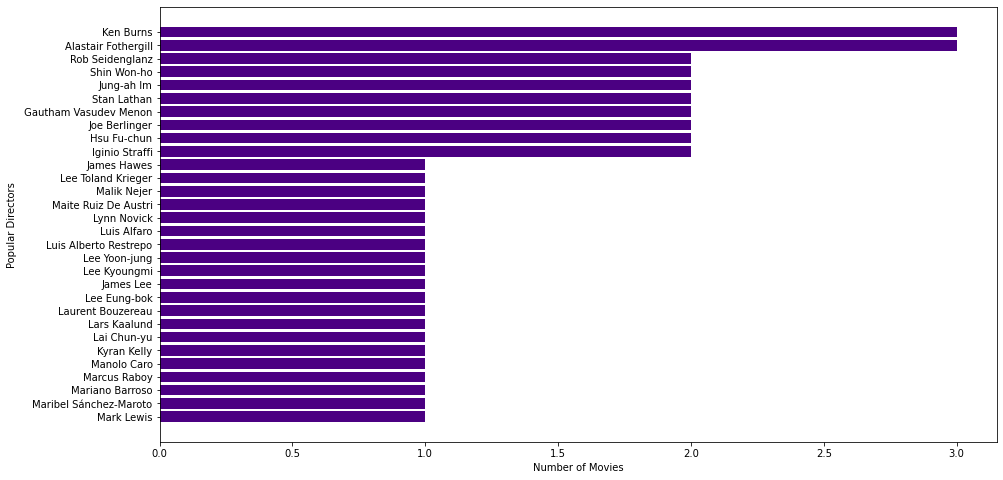

In [72]:
df_directors=df_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

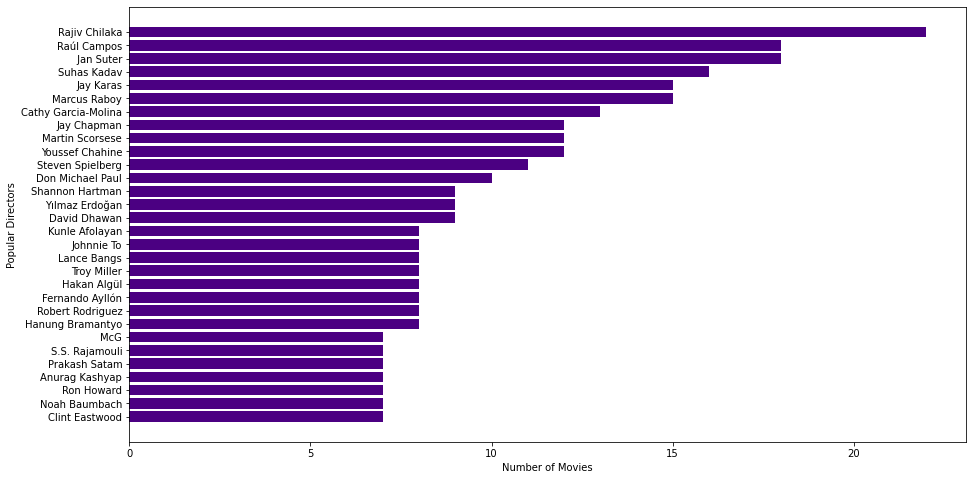

In [73]:
df_directors=df_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

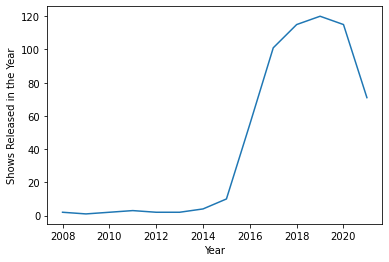

In [74]:
df_year=df_shows.groupby(['Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='Year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

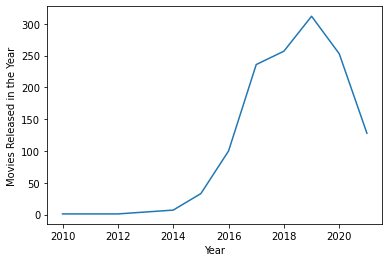

In [75]:
df_year=df_movies.groupby(['Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='Year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

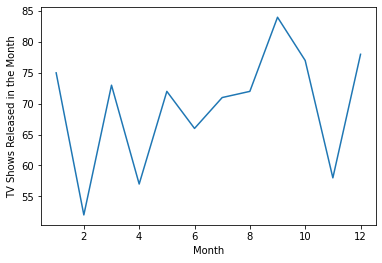

In [76]:
df_month=df_shows.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

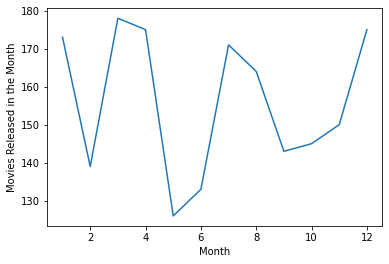

In [77]:
df_month=df_movies.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

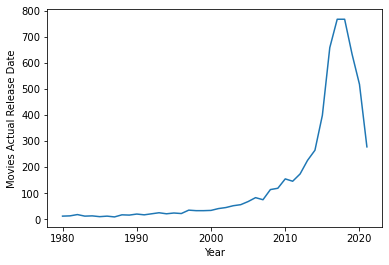

In [78]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

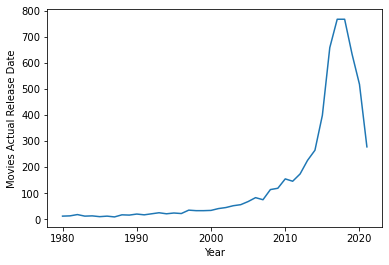

In [79]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020

## Questions to be Explored Now for Recommendations

1) So this time, the granularity level is country and analysis of TV Shows/Movies the country brings. I am going to consider only the top countries individually for TV Shows and Movies. There are definitely some common countries too which bring out quality content in both TV Shows and Movies.

2) Which Genres do these countries offer and what are the intended audiences(Ratings) which are popular in Netflix?

3)In case of Movies, what is the duration/length of movies which makes them special and depicts attention span?

4)Who are the popular actors/directors across TV Shows and Movies in these countries?

5)In what time of the year, people tend to watch movies and shows in these countries?

6)Popular Actor and Director Combinations in these countries

In [80]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['United States','India','United Kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['Japan','South Korea']

### Univariate Analysis separately for shows and movies in USA

In [81]:
#Analyzing USA for both shows and movies
df_usa_shows=df_main[df_main['country']=='United States'][df_main[df_main['country']=='United States']['type']=='TV Show']
df_usa_movies=df_main[df_main['country']=='United States'][df_main[df_main['country']=='United States']['type']=='Movie']


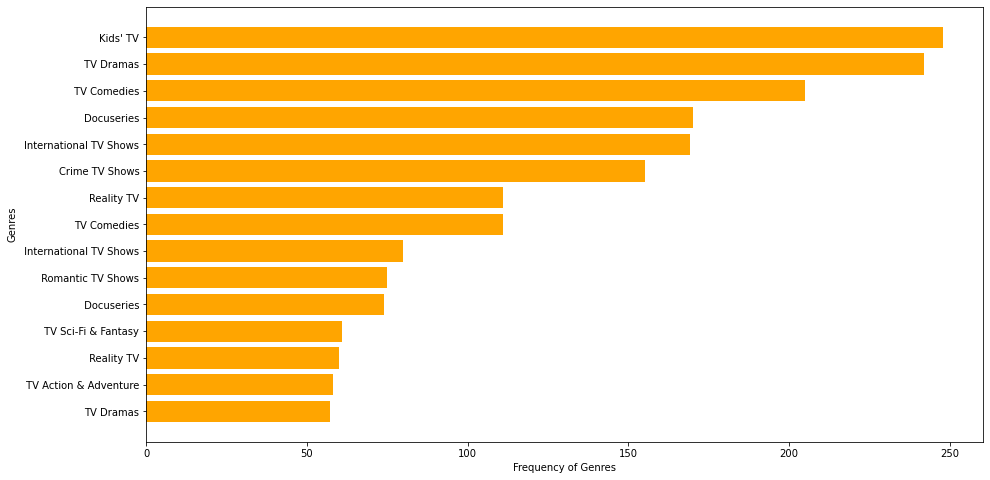

In [82]:
df_genre=df_usa_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

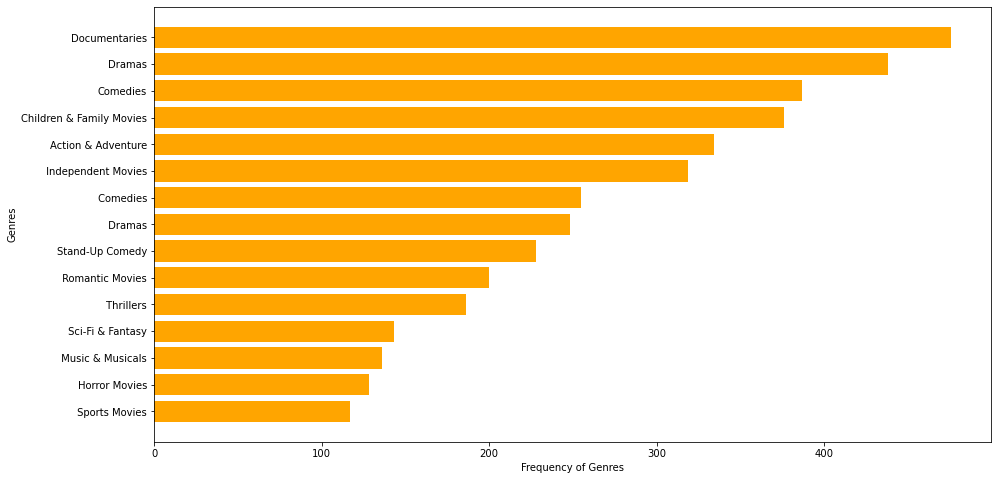

In [83]:
df_genre=df_usa_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Documentaries, Family Movies and Action Genres in Movies are popular in USA

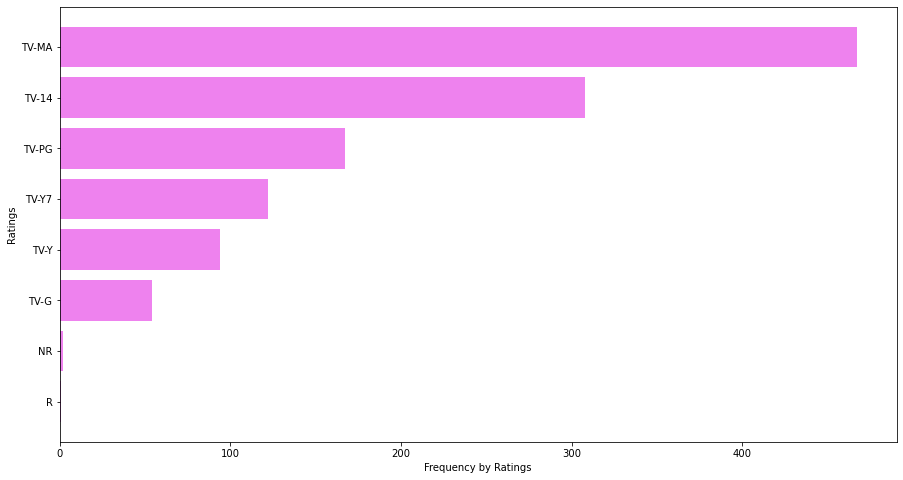

In [84]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

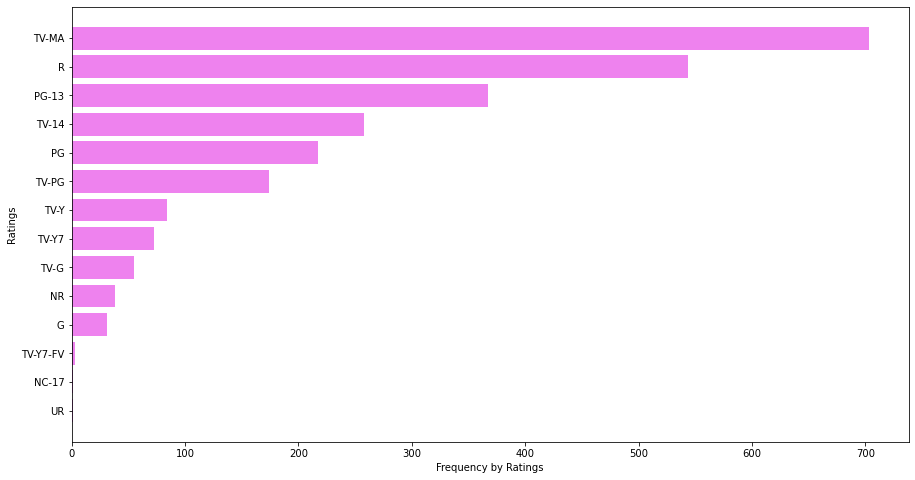

In [85]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages in both Movies and TV Shows in USA

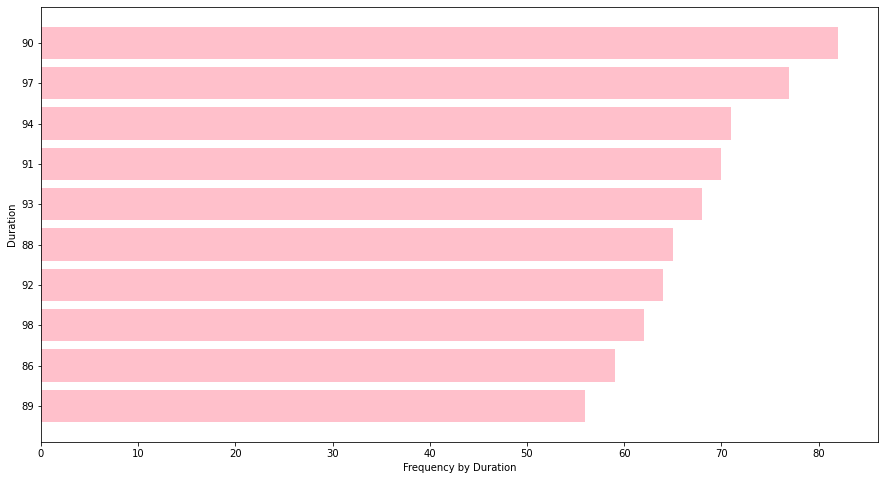

In [86]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 is the ranges of minutes for which most movies lie. So quite possibly 80-120 mins is the sweet spot we would be wanting for movies in USA

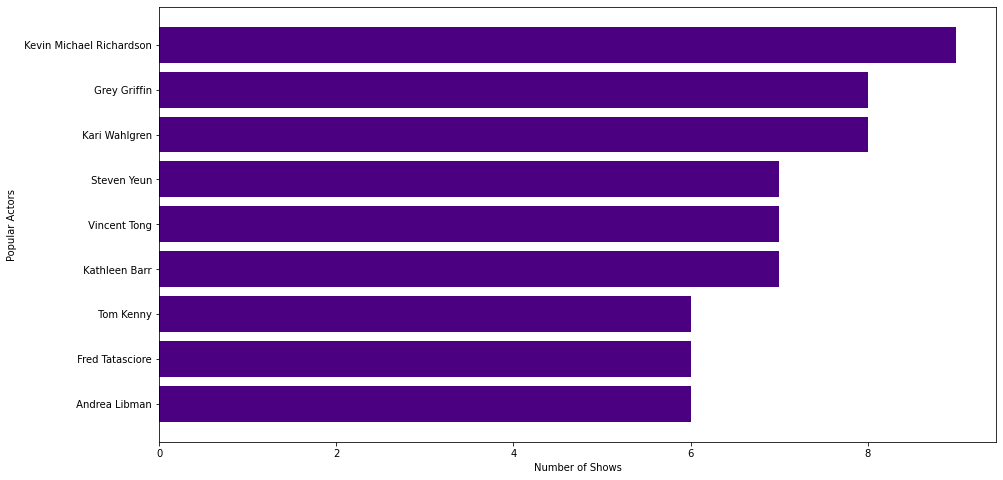

In [87]:
df_actors=df_usa_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

Kari Wahlgrem,Grey Griffin and Kevin Richardson are the most popular actors across TV Shows in USA

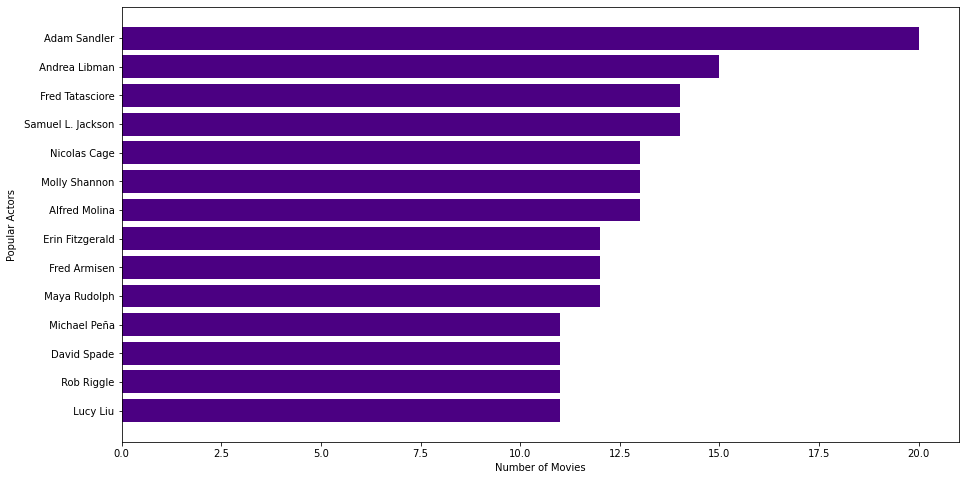

In [88]:
df_actors=df_usa_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Adam Sandler,Andrea Libman, Fred Tatasciore are popular directors across TV Shows on Netflix in USA

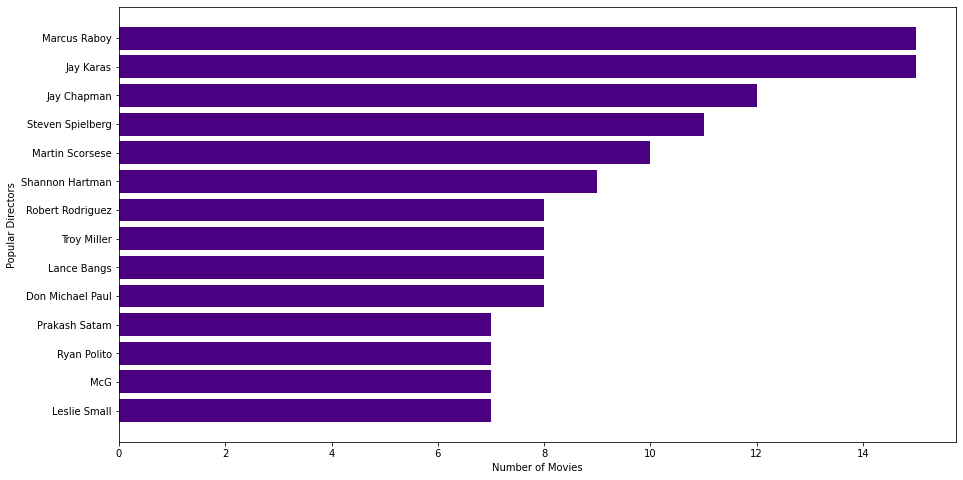

In [89]:
df_directors=df_usa_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Jay Karas,Marcus Raboy,Steven Spielberg and Jay Chapman are popular directors across movies in USA

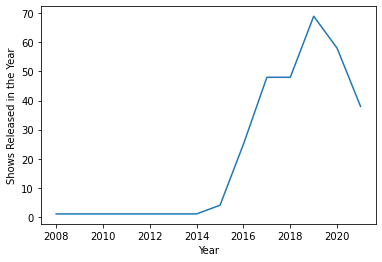

In [90]:
df_year=df_usa_shows.groupby(['Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='Year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

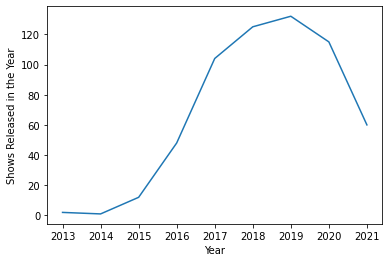

In [91]:
df_year=df_usa_movies.groupby(['Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='Year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

In USA, number of shows remained the same in 2021 as they were in 2020 while number of movies declined:

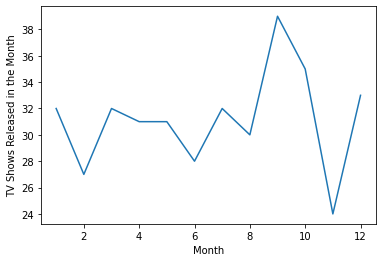

In [92]:
df_month=df_usa_shows.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

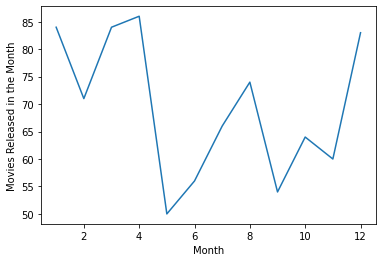

In [93]:
df_month=df_usa_movies.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in July and September in USA

Movies are added in Netflix in USA by a tremendous amount in first week/last month of current year and first month of next year



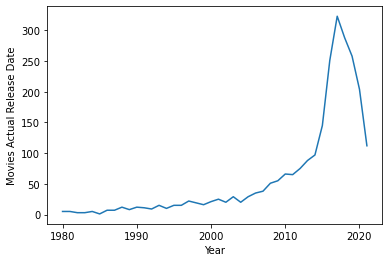

In [94]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

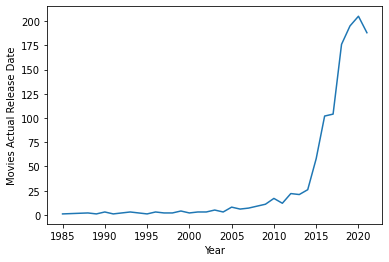

In [95]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In USA, though both Movies and Shows have reduced in 2021, the amount of decrease in number of TV Shows is small as compared to Movies

In [96]:
#Analysing a combination of actors and directors
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.cast.str.cat(df_usa_movies.director, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['cast']!='Unknown Actor']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['director']!='Unknown Director']
df_usa_movies_subset.head()

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre,Actor_Director_Combination
159,My Little Pony: A New Generation,Vanessa Hudgens,Movie,2021-09-15,2021,PG,91,2021.0,9.0,Robert Cullen,United States,Children & Family Movies,Vanessa Hudgens and Robert Cullen
160,My Little Pony: A New Generation,Vanessa Hudgens,Movie,2021-09-15,2021,PG,91,2021.0,9.0,José Luis Ucha,United States,Children & Family Movies,Vanessa Hudgens and José Luis Ucha
161,My Little Pony: A New Generation,Kimiko Glenn,Movie,2021-09-15,2021,PG,91,2021.0,9.0,Robert Cullen,United States,Children & Family Movies,Kimiko Glenn and Robert Cullen
162,My Little Pony: A New Generation,Kimiko Glenn,Movie,2021-09-15,2021,PG,91,2021.0,9.0,José Luis Ucha,United States,Children & Family Movies,Kimiko Glenn and José Luis Ucha
163,My Little Pony: A New Generation,James Marsden,Movie,2021-09-15,2021,PG,91,2021.0,9.0,Robert Cullen,United States,Children & Family Movies,James Marsden and Robert Cullen


In [97]:
df_usa_shows['Actor_Director_Combination'] = df_usa_shows.cast.str.cat(df_usa_shows.director, sep=' and ')
df_usa_shows_subset=df_usa_shows[df_usa_shows['cast']!='Unknown Actor']
df_usa_shows_subset=df_usa_shows_subset[df_usa_shows_subset['director']!='Unknown Director']
df_usa_shows_subset.head()

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre,Actor_Director_Combination
111,Midnight Mass,Kate Siegel,TV Show,2021-09-16,2021,TV-MA,1,2021.0,9.0,Mike Flanagan,United States,TV Dramas,Kate Siegel and Mike Flanagan
112,Midnight Mass,Kate Siegel,TV Show,2021-09-16,2021,TV-MA,1,2021.0,9.0,Mike Flanagan,United States,TV Horror,Kate Siegel and Mike Flanagan
113,Midnight Mass,Kate Siegel,TV Show,2021-09-16,2021,TV-MA,1,2021.0,9.0,Mike Flanagan,United States,TV Mysteries,Kate Siegel and Mike Flanagan
114,Midnight Mass,Zach Gilford,TV Show,2021-09-16,2021,TV-MA,1,2021.0,9.0,Mike Flanagan,United States,TV Dramas,Zach Gilford and Mike Flanagan
115,Midnight Mass,Zach Gilford,TV Show,2021-09-16,2021,TV-MA,1,2021.0,9.0,Mike Flanagan,United States,TV Horror,Zach Gilford and Mike Flanagan


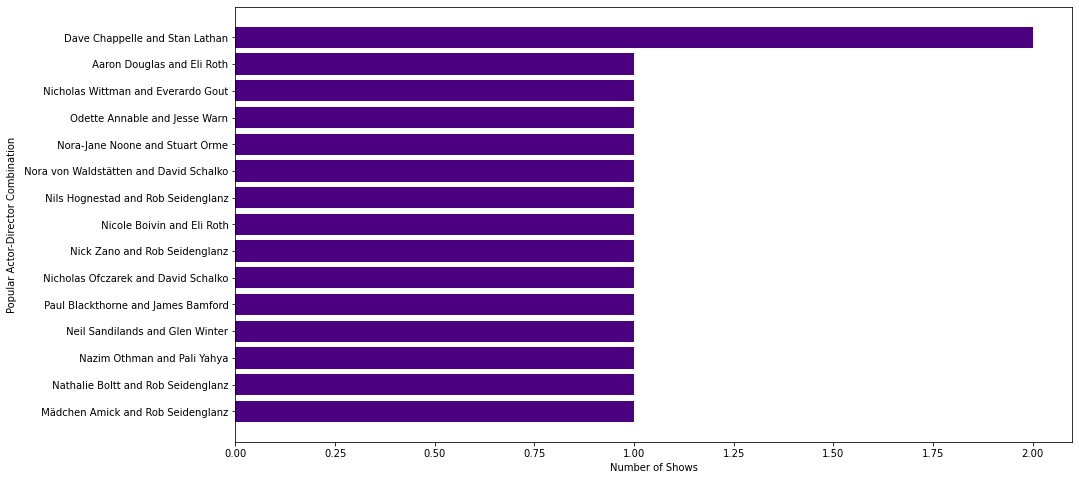

In [98]:
df_actors_directors=df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

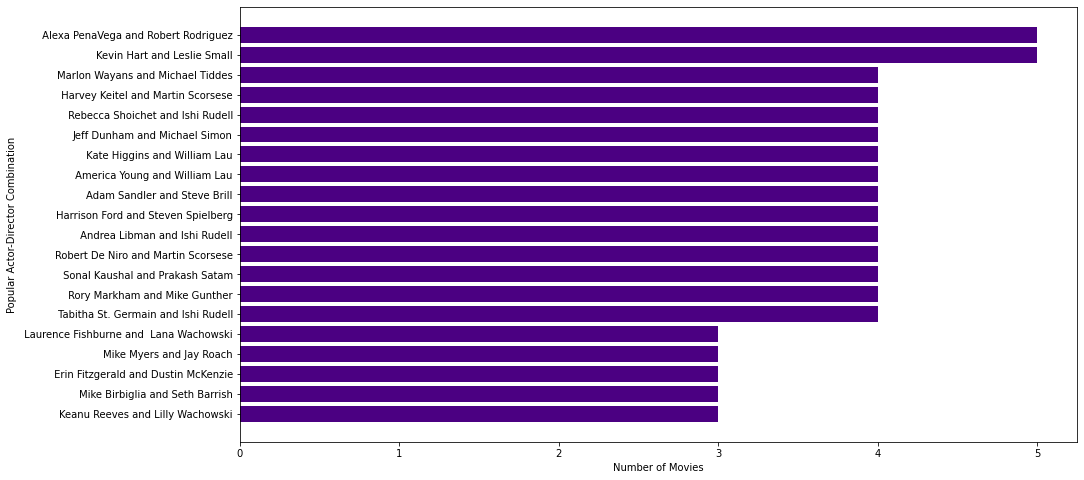

In [99]:
df_actors_directors=df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [100]:
df_actors_directors[::-1]['Actor_Director_Combination'].values

array(['Keanu Reeves and Lilly Wachowski',
       'Mike Birbiglia and Seth Barrish',
       ' Erin Fitzgerald and Dustin McKenzie', 'Mike Myers and Jay Roach',
       ' Laurence Fishburne and  Lana Wachowski',
       ' Tabitha St. Germain and Ishi Rudell',
       ' Rory Markham and Mike Gunther',
       ' Sonal Kaushal and Prakash Satam',
       'Robert De Niro and Martin Scorsese',
       ' Andrea Libman and Ishi Rudell',
       'Harrison Ford and Steven Spielberg',
       'Adam Sandler and Steve Brill', ' America Young and William Lau',
       ' Kate Higgins and William Lau', 'Jeff Dunham and Michael Simon',
       ' Rebecca Shoichet and Ishi Rudell',
       ' Harvey Keitel and Martin Scorsese',
       'Marlon Wayans and Michael Tiddes', 'Kevin Hart and Leslie Small',
       ' Alexa PenaVega and Robert Rodriguez'], dtype=object)

**The Most Popular Actor Director Combination in Movies Across USA are:-**

<br>
'Kevin Hart and Leslie Small',
<br>
 ' Alexa PenaVega and Robert Rodriguez',
<br>






**The Second Most Popular Actor Director Combination in Movies Across USA are:-**
 ' Andrea Libman and Ishi Rudell',
  'Harrison Ford and Steven Spielberg',
   'Adam Sandler and Steve Brill', ' America Young and William Lau',
       ' Kate Higgins and William Lau', 'Jeff Dunham and Michael Simon',
       ' Rebecca Shoichet and Ishi Rudell',
       ' Harvey Keitel and Martin Scorsese',
       'Marlon Wayans and Michael Tiddes',


Univariate Analysis separately for shows and movies in India

In [106]:
df_india_shows=df_main[(df_main['country']=='India')& (df_main['type']=='TV Show')]
df_india_movies=df_main[(df_main['country']=='India')& (df_main['type']=='Movie')]

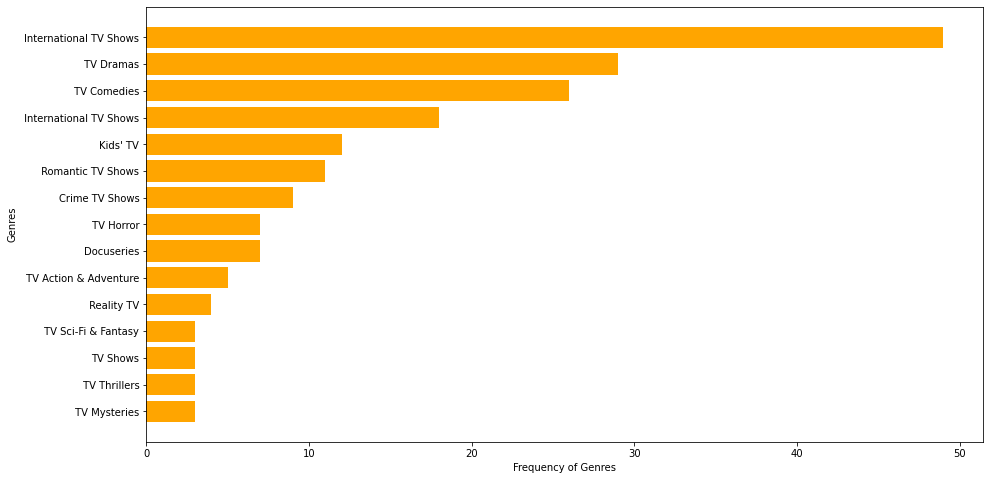

In [107]:
df_genre=df_india_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows and International TV Shows Genres are popular in TV Series in India

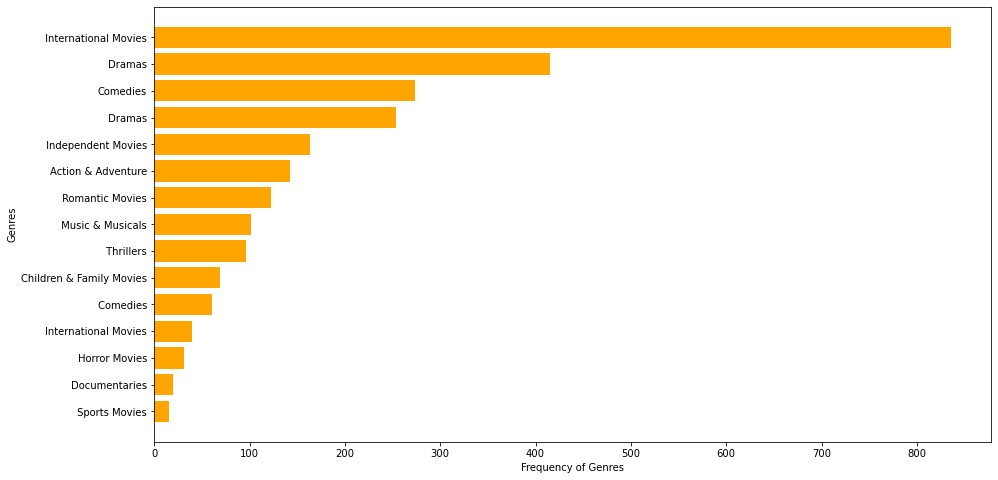

In [108]:
df_genre=df_india_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India

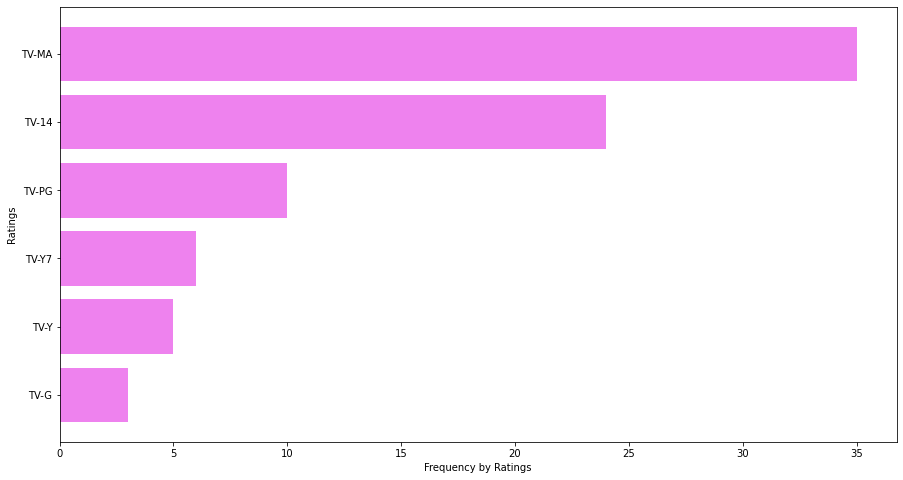

In [109]:
df_rating=df_india_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

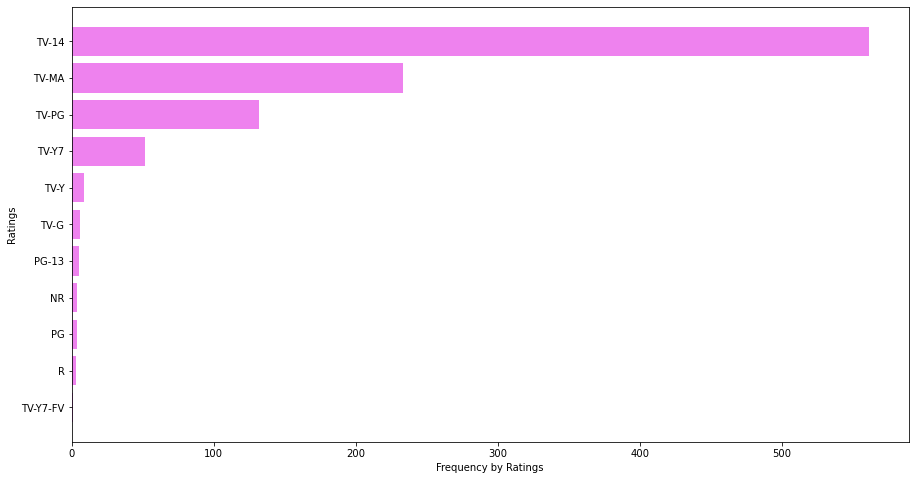

In [110]:
df_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences in TV Shows and those appropriate for people over 14 in Movies in India.

Now this indeed seems to be the case. Indian TV Shows in Netflix are without a shadow of doubt intended for Mature Audiences while Movies for over 14 years of age.

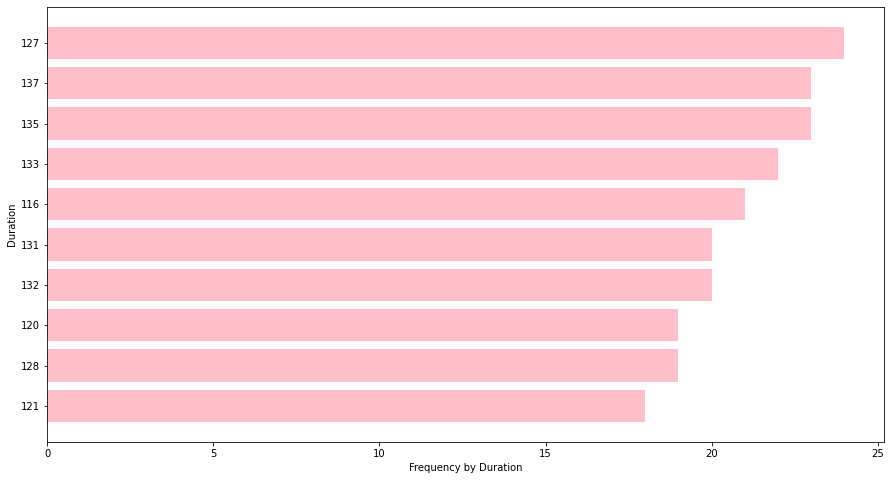

In [111]:
df_duration=df_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()


Across movies ranges of minutes in India are comparatively greater than USA with a sweet spot at 120-150 mins

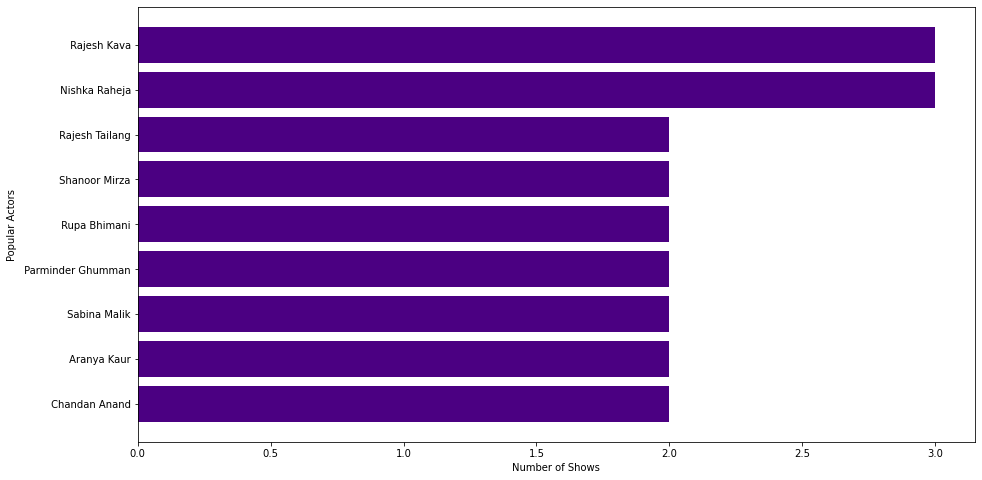

In [112]:
df_actors=df_india_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [114]:
df_actors['cast'].values

array([' Rajesh Kava', ' Nishka Raheja', ' Rajesh Tailang',
       ' Shanoor Mirza', ' Rupa Bhimani', ' Parminder Ghumman',
       ' Sabina Malik', ' Aranya Kaur', ' Chandan Anand'], dtype=object)

**Popular Actors in TV Shows in India are:-**
<br>
'Rajesh Kava',
<br>
'Nishka Raheja',
<br>
'Prakash Raj',
<br>
'Sabina Malik',
<br>
'Anjali',
<br>
'Aranya Kaur',
<br>
'Sonal Kaushal',
<br>
'Chandan Anand',
<br>
'Danish Husain'

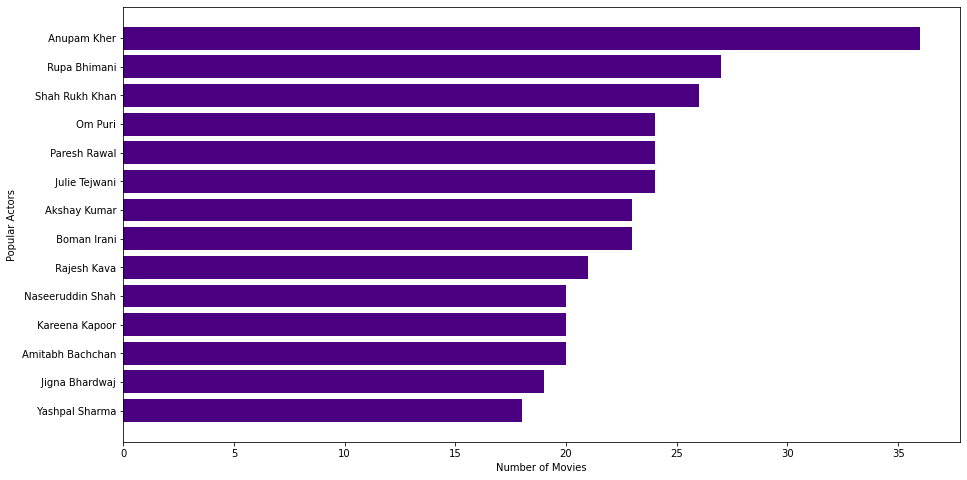

In [115]:
df_actors=df_india_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [116]:
df_actors.values

array([[' Anupam Kher', 36],
       [' Rupa Bhimani', 27],
       ['Shah Rukh Khan', 26],
       [' Om Puri', 24],
       [' Paresh Rawal', 24],
       [' Julie Tejwani', 24],
       ['Akshay Kumar', 23],
       [' Boman Irani', 23],
       [' Rajesh Kava', 21],
       [' Naseeruddin Shah', 20],
       [' Kareena Kapoor', 20],
       ['Amitabh Bachchan', 20],
       [' Jigna Bhardwaj', 19],
       [' Yashpal Sharma', 18]], dtype=object)

**Popular actors across Movies in India:-**
<br>
'Anupam Kher',
<br>
'Shah Rukh Khan',
<br>
'Naseeruddin Shah',
<br>
'Akshay Kumar',
<br>
'Om Puri',
<br>
'Paresh Rawal',
<br>
'Julie Tejwani',
<br>
'Amitabh Bachchan',
<br>
'Boman Irani',
<br>
'Rupa Bhimani',
<br>
'Kareena Kapoor',
<br>
'Ajay Devgn',
<br>
'Rajesh Kava',
<br>
'Kay Kay Menon'

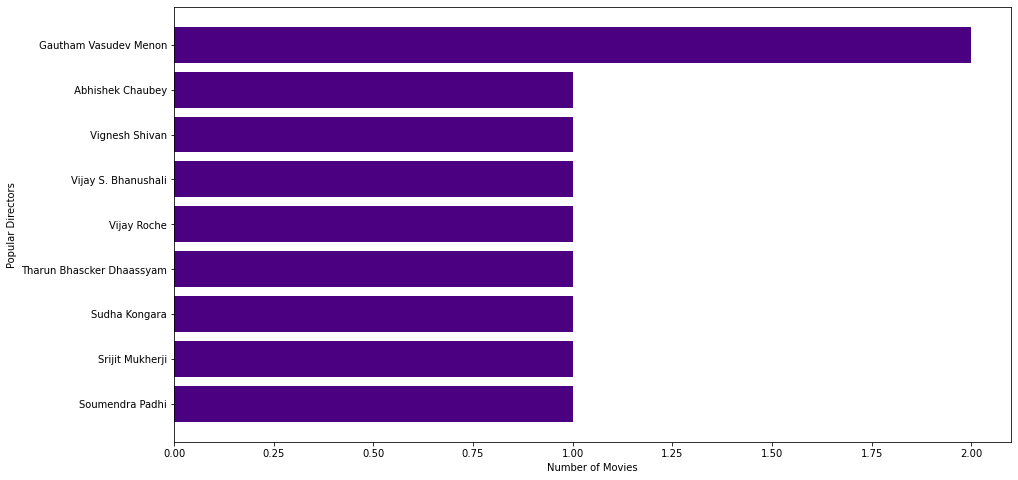

In [118]:
df_directors=df_india_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [119]:
df_directors.values

array([[' Gautham Vasudev Menon', 2],
       [' Abhishek Chaubey', 1],
       [' Vignesh Shivan', 1],
       ['Vijay S. Bhanushali', 1],
       ['Vijay Roche', 1],
       ['Tharun Bhascker Dhaassyam', 1],
       ['Sudha Kongara', 1],
       ['Srijit Mukherji', 1],
       ['Soumendra Padhi', 1]], dtype=object)

**Popular Directors Across Movies in India:-**
<br>
'Gautham Vasudev Menon',
<br>
'Abhishek Chaubey',
<br>
'Sudha Kongara',
<br>
'Rathindran R Prasad',
<br>
'Sankalp Reddy',
<br>
'Sarjun',
<br>
'Soumendra Padhi',
<br>
'Srijit Mukherji',
<br>
'Tharun Bhascker Dhaassyam'

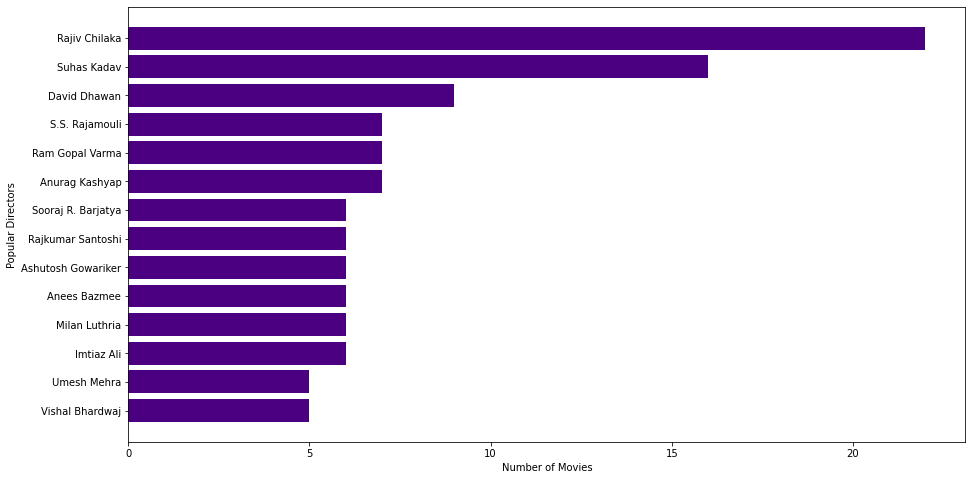

In [121]:
df_directors=df_india_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [122]:
df_directors.values

array([['Rajiv Chilaka', 22],
       ['Suhas Kadav', 16],
       ['David Dhawan', 9],
       ['S.S. Rajamouli', 7],
       ['Ram Gopal Varma', 7],
       ['Anurag Kashyap', 7],
       ['Sooraj R. Barjatya', 6],
       ['Rajkumar Santoshi', 6],
       ['Ashutosh Gowariker', 6],
       ['Anees Bazmee', 6],
       ['Milan Luthria', 6],
       ['Imtiaz Ali', 6],
       ['Umesh Mehra', 5],
       ['Vishal Bhardwaj', 5]], dtype=object)

**Popular directors across movies in India:-**
['Rajiv Chilaka', 22],
       ['Suhas Kadav', 16],
       ['David Dhawan', 9],
       ['S.S. Rajamouli', 7],
       ['Ram Gopal Varma', 7],
       ['Anurag Kashyap', 7],
       ['Sooraj R. Barjatya', 6],
       ['Rajkumar Santoshi', 6],
       ['Ashutosh Gowariker', 6],
       ['Anees Bazmee', 6],
       ['Milan Luthria', 6],
       ['Imtiaz Ali', 6],
       ['Umesh Mehra', 5],
       ['Vishal Bhardwaj', 5]

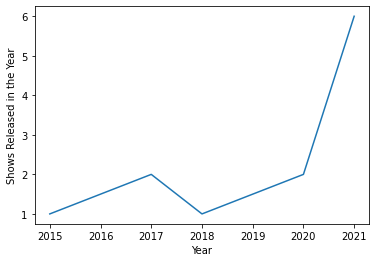

In [123]:
df_year=df_india_shows.groupby(['Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='Year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

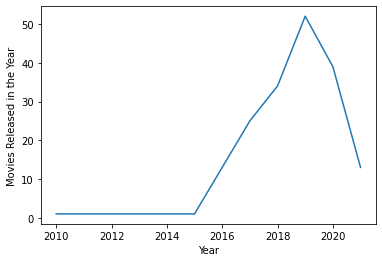

In [124]:
df_year=df_india_movies.groupby(['Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='Year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In India,he addition of TV shows huge increase in 2021.

In India, Movies were increasingly added till 2019 but it has been a huge downhill since then. Now that's preposterous, since and soemthing has to be recommended to the Netflix Team with regards to that.

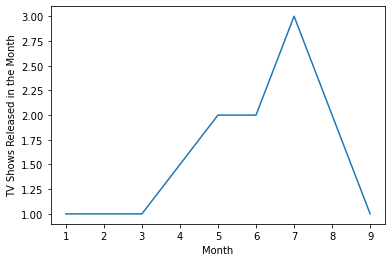

In [139]:
df_month=df_india_shows.groupby(['month']).agg({"title":"nunique"}).reset_index()
df_month.month=df_month['month'].astype(int)
df_month.title=df_month.title.astype(int)
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

In [141]:
df_month

,month,title
0,1,1
1,3,1
2,5,2
3,6,2
4,7,3
5,8,2
6,9,1


In [127]:
df_india_shows.groupby(['month']).agg({"title":"nunique"}).reset_index()

,month,title
0,1.0,1
1,3.0,1
2,5.0,2
3,6.0,2
4,7.0,3
5,8.0,2
6,9.0,1


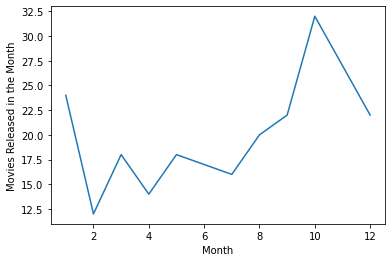

In [126]:
df_month=df_india_movies.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in July in India

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

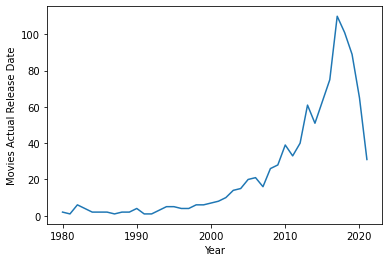

In [151]:
df_release_year=df_india_movies[df_india_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

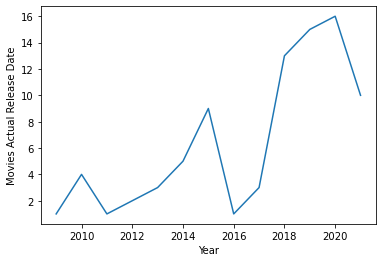

In [152]:
df_release_year=df_india_shows[df_india_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

The understandable trend amongs movies and TV Shows across India in Netflix is the reduction of movies after 2020

In [156]:
#Analysing a combination of actors and directors
df_india_movies['Actor_Director_Combination'] = df_india_movies.cast.str.cat(df_india_movies.director, sep=' and ')
df_india_movies_subset=df_india_movies[df_india_movies['cast']!='Unknown Actor']
df_india_movies_subset=df_india_movies_subset[df_india_movies_subset['director']!='Unknown Director']
df_india_movies_subset.head()

C:\Users\Tnluser\AppData\Local\Temp\ipykernel_127004\1920566879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_movies['Actor_Director_Combination'] = df_india_movies.cast.str.cat(df_india_movies.director, sep=' and ')


,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre,Actor_Director_Combination
621,Avvai Shanmughi,Kamal Hassan,Movie,2021-08-31,1996,TV-PG,161,2021.0,8.0,K.S. Ravikumar,India,Comedies,Kamal Hassan and K.S. Ravikumar
622,Avvai Shanmughi,Kamal Hassan,Movie,2021-08-31,1996,TV-PG,161,2021.0,8.0,K.S. Ravikumar,India,International Movies,Kamal Hassan and K.S. Ravikumar
629,Avvai Shanmughi,Nassar,Movie,2021-08-28,1996,TV-PG,161,2021.0,8.0,K.S. Ravikumar,India,Comedies,Nassar and K.S. Ravikumar
630,Avvai Shanmughi,Nassar,Movie,2021-08-28,1996,TV-PG,161,2021.0,8.0,K.S. Ravikumar,India,International Movies,Nassar and K.S. Ravikumar
631,Avvai Shanmughi,S.P. Balasubrahmanyam,Movie,2021-08-28,1996,TV-PG,161,2021.0,8.0,K.S. Ravikumar,India,Comedies,S.P. Balasubrahmanyam and K.S. Ravikumar


In [157]:
df_india_shows['Actor_Director_Combination'] = df_india_shows.cast.str.cat(df_india_shows.director, sep=' and ')
df_india_shows_subset=df_india_shows[df_india_shows['cast']!='Unknown Actor']
df_india_shows_subset=df_india_shows_subset[df_india_shows_subset['director']!='Unknown Director']
df_india_shows_subset.head()

C:\Users\Tnluser\AppData\Local\Temp\ipykernel_127004\3326867850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_shows['Actor_Director_Combination'] = df_india_shows.cast.str.cat(df_india_shows.director, sep=' and ')


,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre,Actor_Director_Combination
7005,Navarasa,Suriya,TV Show,2020-06-07,2021,TV-MA,1,2020.0,6.0,Bejoy Nambiar,India,TV Shows,Suriya and Bejoy Nambiar
7006,Navarasa,Suriya,TV Show,2020-06-07,2021,TV-MA,1,2020.0,6.0,Priyadarshan,India,TV Shows,Suriya and Priyadarshan
7007,Navarasa,Suriya,TV Show,2020-06-07,2021,TV-MA,1,2020.0,6.0,Karthik Narain,India,TV Shows,Suriya and Karthik Narain
7008,Navarasa,Suriya,TV Show,2020-06-07,2021,TV-MA,1,2020.0,6.0,Vasanth Sai,India,TV Shows,Suriya and Vasanth Sai
7009,Navarasa,Suriya,TV Show,2020-06-07,2021,TV-MA,1,2020.0,6.0,Karthik Subbaraj,India,TV Shows,Suriya and Karthik Subbaraj


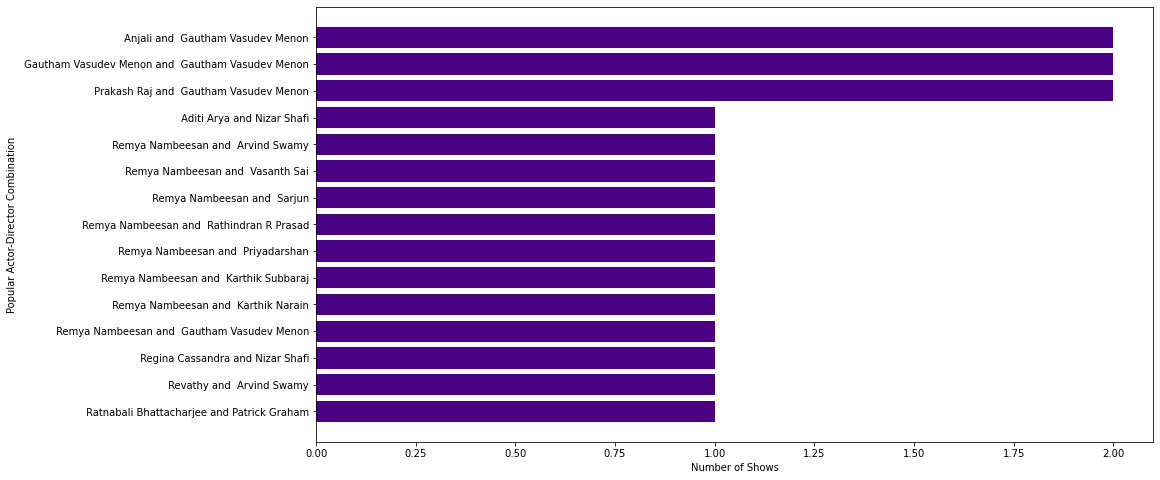

In [158]:
df_actors_directors=df_india_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

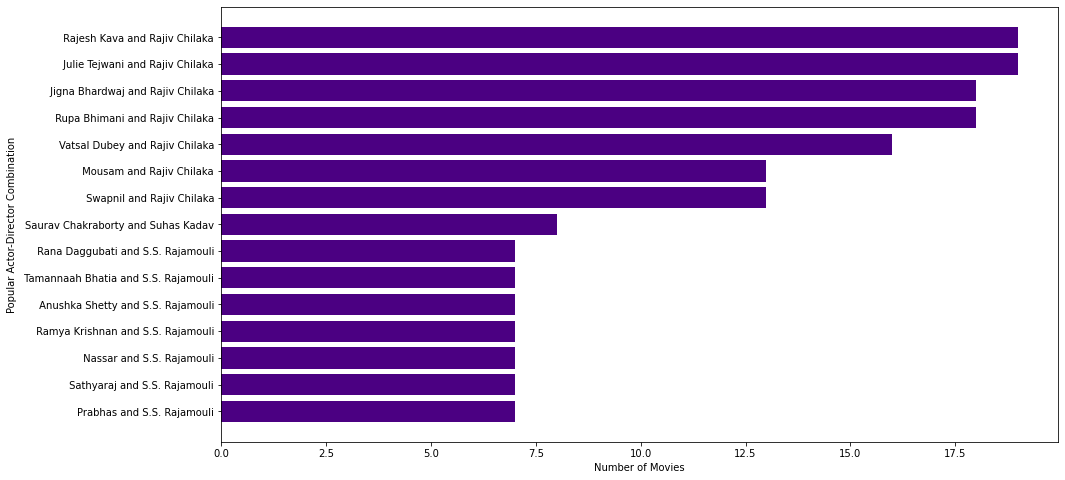

In [159]:
df_actors_directors=df_india_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [160]:
df_india_movies[df_india_movies['director']=='Rajiv Chilaka']

,title,cast,type,date_added,release_year,rating,duration,Year,month,director,country,genre,Actor_Director_Combination
10058,Chhota Bheem - Neeli Pahaadi,Vatsal Dubey,Movie,2019-10-25,2013,TV-Y7,64,2019.0,10.0,Rajiv Chilaka,India,Children & Family Movies,Vatsal Dubey and Rajiv Chilaka
10059,Chhota Bheem - Neeli Pahaadi,Julie Tejwani,Movie,2019-10-25,2013,TV-Y7,64,2019.0,10.0,Rajiv Chilaka,India,Children & Family Movies,Julie Tejwani and Rajiv Chilaka
10060,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani,Movie,2019-10-25,2013,TV-Y7,64,2019.0,10.0,Rajiv Chilaka,India,Children & Family Movies,Rupa Bhimani and Rajiv Chilaka
10061,Chhota Bheem - Neeli Pahaadi,Jigna Bhardwaj,Movie,2019-10-25,2013,TV-Y7,64,2019.0,10.0,Rajiv Chilaka,India,Children & Family Movies,Jigna Bhardwaj and Rajiv Chilaka
10062,Chhota Bheem - Neeli Pahaadi,Rajesh Kava,Movie,2019-10-25,2013,TV-Y7,64,2019.0,10.0,Rajiv Chilaka,India,Children & Family Movies,Rajesh Kava and Rajiv Chilaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145857,Chhota Bheem Kungfu Dhamaka,Vaibhav Thakkar,Movie,NaT,2019,TV-Y7,112,NaN,NaN,Rajiv Chilaka,India,Children & Family Movies,Vaibhav Thakkar and Rajiv Chilaka
145859,Chhota Bheem Kungfu Dhamaka,Samriddhi Shuklaa,Movie,NaT,2019,TV-Y7,112,NaN,NaN,Rajiv Chilaka,India,Children & Family Movies,Samriddhi Shuklaa and Rajiv Chilaka
145861,Chhota Bheem Kungfu Dhamaka,Aditya Raj Sharma,Movie,NaT,2019,TV-Y7,112,NaN,NaN,Rajiv Chilaka,India,Children & Family Movies,Aditya Raj Sharma and Rajiv Chilaka
145863,Chhota Bheem Kungfu Dhamaka,Vinod Kulkarni,Movie,NaT,2019,TV-Y7,112,NaN,NaN,Rajiv Chilaka,India,Children & Family Movies,Vinod Kulkarni and Rajiv Chilaka


It seems that Rajiv Chilaka has worked on Chota Bheem and has been able to create some good content in its movies. He can be relied on for more Chota Bheem stories

In [161]:
df_actors_directors['Actor_Director_Combination'].values

array([' Rajesh Kava and Rajiv Chilaka',
       ' Julie Tejwani and Rajiv Chilaka',
       ' Jigna Bhardwaj and Rajiv Chilaka',
       ' Rupa Bhimani and Rajiv Chilaka',
       'Vatsal Dubey and Rajiv Chilaka', ' Mousam and Rajiv Chilaka',
       ' Swapnil and Rajiv Chilaka', 'Saurav Chakraborty and Suhas Kadav',
       ' Rana Daggubati and S.S. Rajamouli',
       ' Tamannaah Bhatia and S.S. Rajamouli',
       ' Anushka Shetty and S.S. Rajamouli',
       ' Ramya Krishnan and S.S. Rajamouli', ' Nassar and S.S. Rajamouli',
       ' Sathyaraj and S.S. Rajamouli', 'Prabhas and S.S. Rajamouli'],
      dtype=object)

**The Most Popular Actor Director Combination in Movies Across India are:-**
<br>
'Rajesh Kava and Rajiv Chilaka',
<br>
'Julie Tejwani and Rajiv Chilaka',
<br>
'Rupa Bhimani and Rajiv Chilaka',
<br>
'Jigna Bhardwaj and Rajiv Chilaka',
<br>
'Vatsal Dubey and Rajiv Chilaka',
<br>
'Mousam and Rajiv Chilaka',
<br>
'Swapnil and Rajiv Chilaka',
<br>
'Saurav Chakraborty and Suhas Kadav',
<br>
'Smita Malhotra and Tilak Shetty',
<br>
'Anupam Kher and David Dhawan',
<br>
'Salman Khan and Sooraj R. Barjatya',

### Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are
Drama, Comedy and International TV Shows/Movies, so content aligning to that
is recommended.

2)Add TV Shows in July/August and Movies in last week of the year/first month of
the next year.

3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows
are also popular along with the genres in first point, hence recommended.


4)The target audience in USA and India is recommended to be 14+ and above ratings while
for UK, its recommended to be completely Mature/R content .

5)Add movies for Indian Audience, it has been declining since 2018..

6) While creating content, take into consideration the popular actors/directors
for that country. Also take into account the director-actor combination which
is highly recommended.